In [259]:
%%capture
%pip install pandas matplotlib

In [ ]:
import pandas as pd
import numpy as np# basic imports
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [261]:
df_file = pd.read_csv('drive/MyDrive/fashion.csv')

In [9]:

fashion.head()

,UserId,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
0,1171579752855683619_212070047,518.0,9840.0,541,abercrombie,High street,"beautiful, summer, fashion, love, cute, food, ...","We were born to be REAL, not to be perfect. ...",https://scontent.cdninstagram.com/t51.2885-15/...,97,...,0.931486,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181
1,1171594777274371222_176762322,7333.0,2300.0,272,abercrombie,High street,"teen, model, brunette, selfie, hollister, snap...","Gotta run, but first, let me take selfie. Me...",https://scontent.cdninstagram.com/t51.2885-15/...,94,...,0.466329,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,91,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,94,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1171508187966229230_2797323089,132.0,456.0,56,abercrombie,High street,"abercrombieandfitch, shopping, love, hollister...",#love #shopping #shoppen #hollister #abercro...,https://scontent.cdninstagram.com/t51.2885-15/...,9,...,0.393063,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [262]:
lst = list(fashion)
feels = lst[25:-1]
count_this_ = {}
Hashtags = fashion.Anger
for Anger in fashion:
  for i in Anger:
    if i is "NAN":
      count_this_ += 1
    else:
      count_this_ = 1

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-262-9c0153440c7d>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is "NAN":


In [263]:
 count_this_

1

We don't have a clear index, but we do have a unique idetifier from the "UserId".


Is there a way for us to view the relationship between the Users, their sentiments and the BrandName?



What are the unique BrandNames? Is there a correlation between a BrandName and a certain sentiment or Hastag? Do we see more references to "sustainability" and "inclusive shoping habits" in under one brand or the other?

In [264]:
# will explore uniques under the different variables
# I am most concerned with Brand, Category, Hashtags, Caption, Likes, and Emotions
brands1 = fashion['BrandName'].unique
brands1

<bound method Series.unique of 0        abercrombie
1        abercrombie
2        abercrombie
3        abercrombie
4        abercrombie
            ...     
24747           zara
24748           zara
24749           zara
24750           zara
24751           zara
Name: BrandName, Length: 1485120, dtype: object>

In [13]:
#define how to aggregate various fields
agg_functions = {'BrandName': 'first', 'Contempt': 'sum'}

#create new DataFrame by combining rows with same id values
df_new = fashion.groupby(fashion['UserId']).aggregate(agg_functions)

#view new DataFrame
print(df_new)


                                      BrandName  Contempt
UserId                                                   
1012125193146036403_50703163      nancygonzalez  0.000000
1012637715007984667_873613508     nancygonzalez  0.000000
1012732429864450100_1451321453    nancygonzalez  0.757198
1012810019976263523_390247316     nancygonzalez  0.000000
1012888749710963858_1195590188    nancygonzalez  0.000000
...                                         ...       ...
1173059790870330526_2533266966  stellamccartney  0.000000
1173061841602621199_245704746   stellamccartney  0.000000
1173062603065811496_2689785535  stellamccartney  0.000000
1173066302904392627_1175836589  stellamccartney  0.000000
1173066749455432357_259356853   stellamccartney  0.000000

[24072 rows x 2 columns]


In [14]:
h = df_new.sample(20)
print(h)

                                      BrandName      Contempt
UserId                                                       
1165823218500064556_611721620            brioni  0.000000e+00
1165118412671632933_1558220976            kiton  0.000000e+00
1168496744004569800_1542611521   maisonmargiela  0.000000e+00
1171411607563899531_481591891        marcjacobs  0.000000e+00
1171330814022680481_224104766   urbanoutfitters  0.000000e+00
1168571035874424861_2721126725           theory  0.000000e+00
1171168441878036519_271814719             jcrew  0.000000e+00
1171439134210211184_2085916486            coach  0.000000e+00
1171515179759944258_2194516135            vince  0.000000e+00
1169500625881397060_486059220            sandro  0.000000e+00
1172437159309469377_650631784         hollister  0.000000e+00
1171487932336420902_1742841133        forever21  3.282000e-07
1170371524948507085_280674717            sandro  0.000000e+00
1154380659617697992_901661539    fabianafilippi  0.000000e+00
11729360

After taking a few random samples, I can see that most reviews left for the given BrandNames are not Neccesarily filled with contempt.


Can I boxplot this data to make it the average?


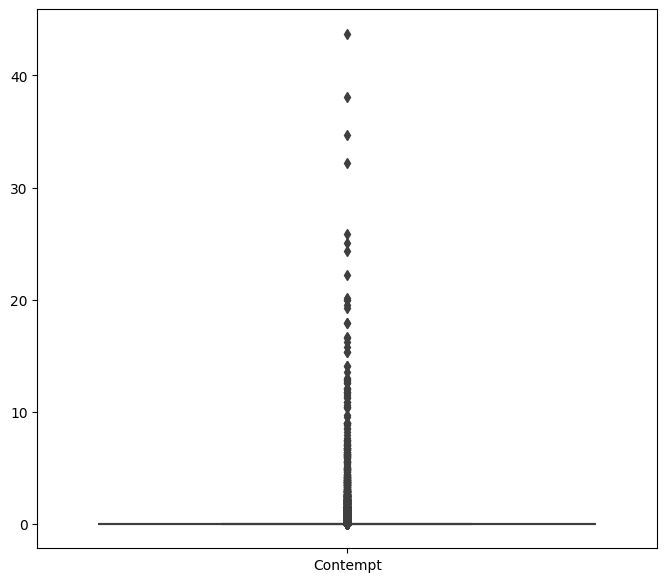

In [15]:

plt.figure(figsize=(8, 7))
sns.boxplot(data=df_new)
plt.show()

In [16]:
df_new

,BrandName,Contempt
UserId,,
1012125193146036403_50703163,nancygonzalez,0.000000
1012637715007984667_873613508,nancygonzalez,0.000000
1012732429864450100_1451321453,nancygonzalez,0.757198
1012810019976263523_390247316,nancygonzalez,0.000000
1012888749710963858_1195590188,nancygonzalez,0.000000
...,...,...
1173059790870330526_2533266966,stellamccartney,0.000000
1173061841602621199_245704746,stellamccartney,0.000000
1173062603065811496_2689785535,stellamccartney,0.000000


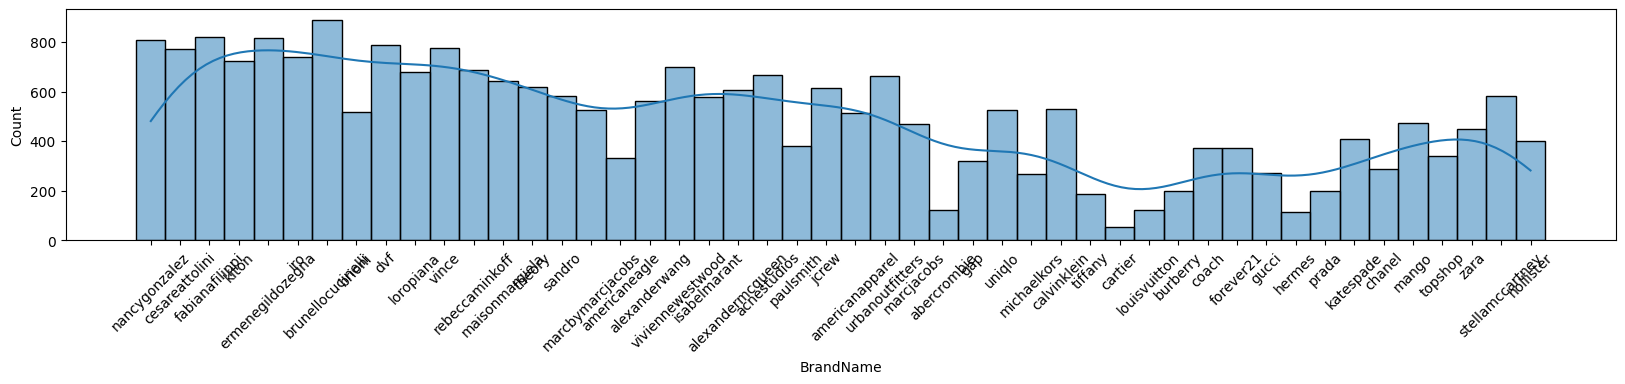

In [17]:
# Hist

fig = plt.figure(figsize=(20,3))
histo1 = fig
histo1 = sns.histplot(df_new.BrandName, kde=True, binwidth=None, pmax=5  )
plt.xticks(rotation=45)

plt.show()

In [265]:
print(set(df_new["BrandName"]))

{'gucci', 'acnestudios', 'fabianafilippi', 'kiton', 'cartier', 'tiffany', 'forever21', 'prada', 'americaneagle', 'gap', 'alexanderwang', 'burberry', 'rebeccaminkoff', 'iro', 'sandro', 'loropiana', 'marcjacobs', 'isabelmarant', 'marcbymarcjacobs', 'ermenegildozegna', 'michaelkors', 'coach', 'katespade', 'chanel', 'alexandermcqueen', 'hermes', 'topshop', 'brunellocucinelli', 'dvf', 'stellamccartney', 'brioni', 'mango', 'theory', 'urbanoutfitters', 'vince', 'maisonmargiela', 'paulsmith', 'americanapparel', 'hollister', 'abercrombie', 'louisvuitton', 'jcrew', 'nancygonzalez', 'uniqlo', 'calvinklein', 'cesareattolini', 'zara', 'viviennewestwood'}


In [266]:
lst3 = (set(df_new["BrandName"]))
lst3

{'abercrombie',
 'acnestudios',
 'alexandermcqueen',
 'alexanderwang',
 'americanapparel',
 'americaneagle',
 'brioni',
 'brunellocucinelli',
 'burberry',
 'calvinklein',
 'cartier',
 'cesareattolini',
 'chanel',
 'coach',
 'dvf',
 'ermenegildozegna',
 'fabianafilippi',
 'forever21',
 'gap',
 'gucci',
 'hermes',
 'hollister',
 'iro',
 'isabelmarant',
 'jcrew',
 'katespade',
 'kiton',
 'loropiana',
 'louisvuitton',
 'maisonmargiela',
 'mango',
 'marcbymarcjacobs',
 'marcjacobs',
 'michaelkors',
 'nancygonzalez',
 'paulsmith',
 'prada',
 'rebeccaminkoff',
 'sandro',
 'stellamccartney',
 'theory',
 'tiffany',
 'topshop',
 'uniqlo',
 'urbanoutfitters',
 'vince',
 'viviennewestwood',
 'zara'}

ValueError: ignored

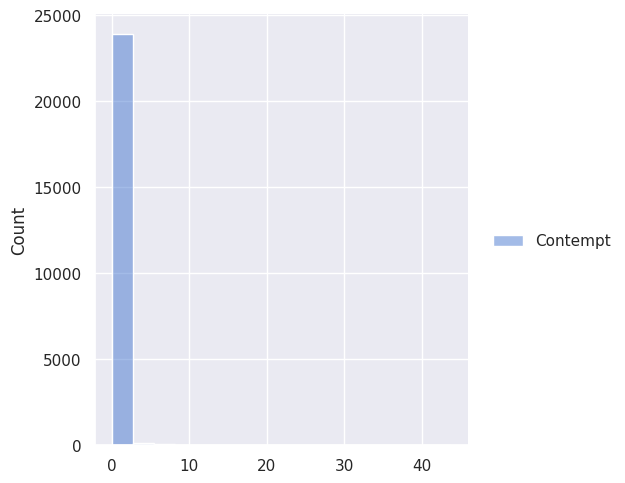

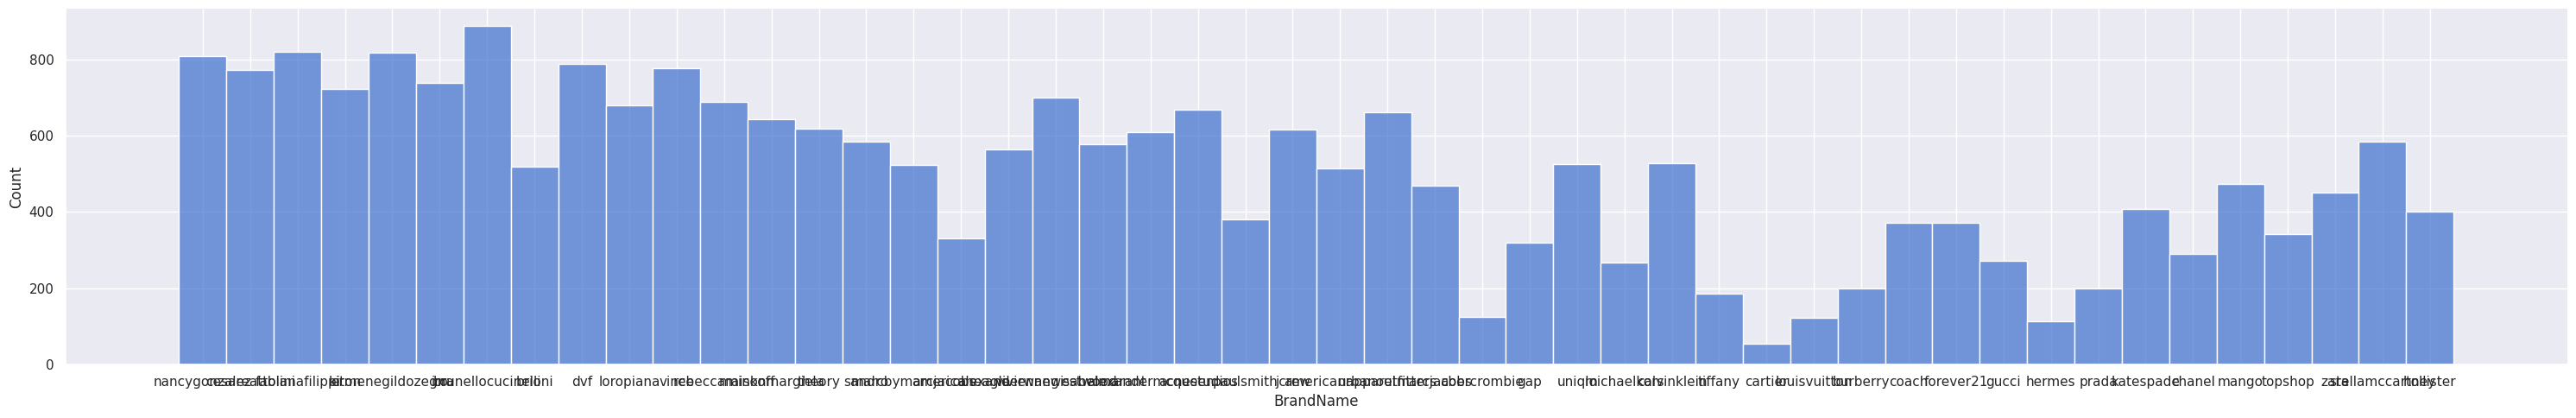

In [18]:
sns.set(color_codes=True)
sns.set(style="darkgrid", palette="muted")
sns.displot(df_new)

for col_id in df_new.columns:
    sns.displot(df_new["BrandName"], aspect=6)
    sns.displot(x='BrandName', y='Contempt', hue='UserId', aspect=2)
    plt.xticks(rotation=45);


plt.xticks(rotation=45);

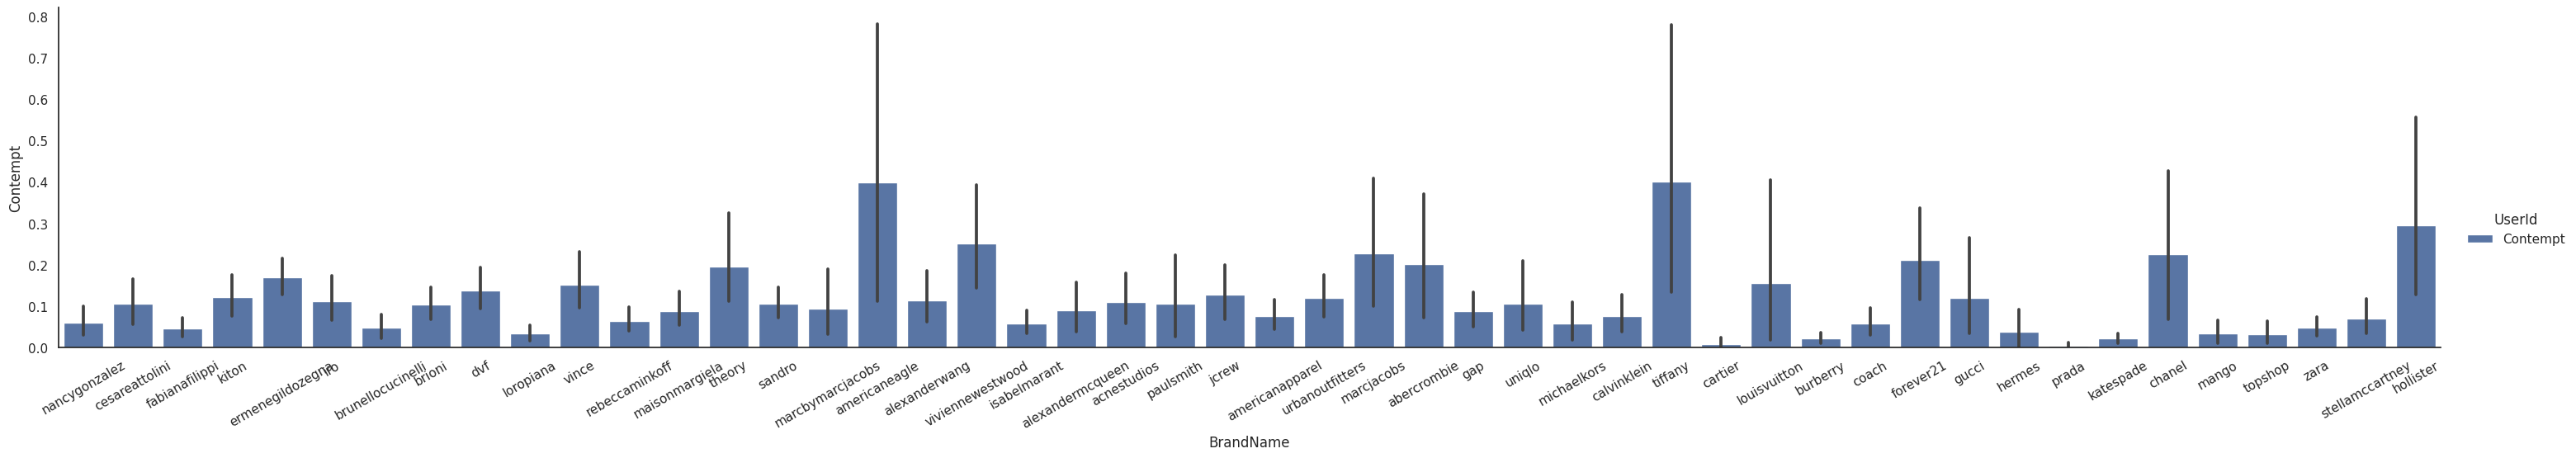

In [19]:
import pickle
data1 = df_new.set_index('BrandName').unstack().reset_index()
data1.columns = ['UserId','BrandName', 'Contempt']


sns.set(style="white")
g = sns.catplot(x='BrandName'
                   ,y= 'Contempt'
                   ,hue='UserId'
                   ,data=data1
                   ,kind='bar'
                   ,aspect=6
                   )
g.set_xticklabels(rotation=30);

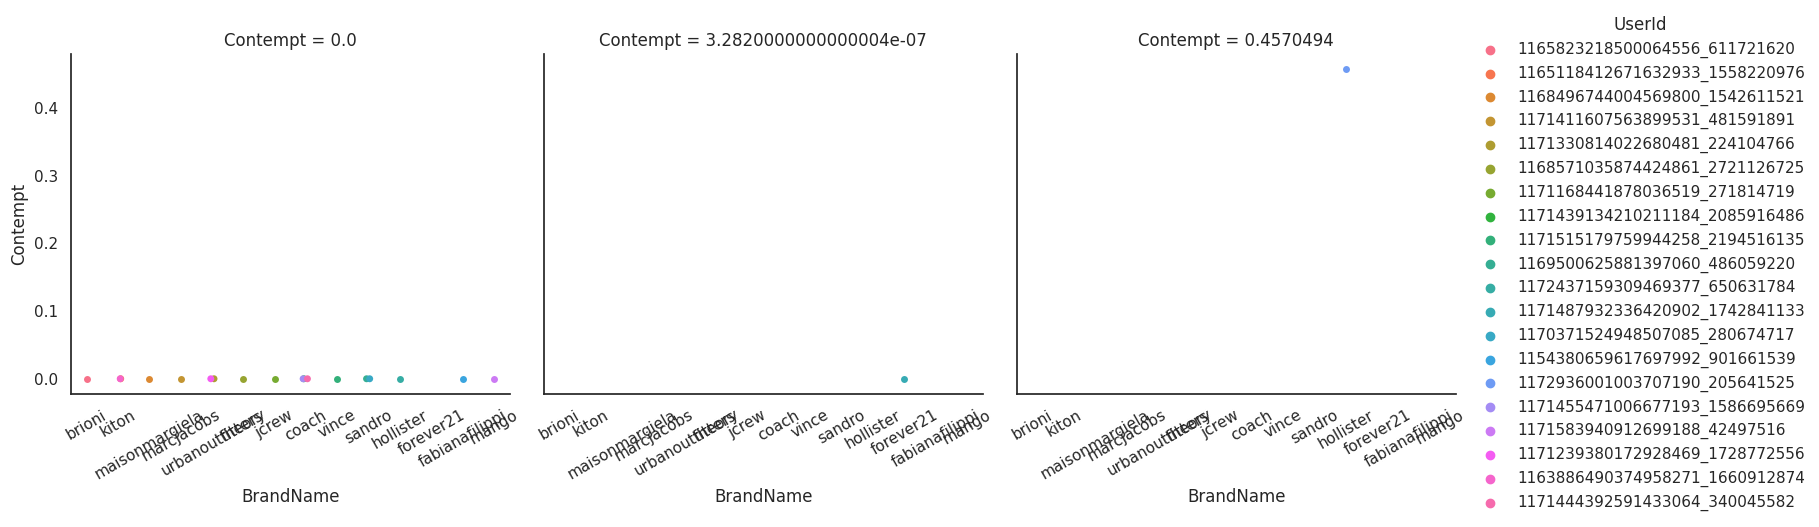

In [267]:
g = sns.catplot(data = h, x ='BrandName', y = "Contempt",col = 'Contempt',hue = 'UserId')

g.set_xticklabels(rotation=30);

In [268]:
#loop through the BrandName to find all instances of "forever21"
#if string "forever21" is found, print the corresponding sentiment

for BrandName in fashion:
  if BrandName == "forever21":
    print(df_new(BrandName))



In [22]:
brandS = list(set(fashion.BrandName)) #creating a list of fashion brands by name
# function "set" returns unique elements in the list
count_dict = {} #intitializing the count dictionary
for brand in brandS: #looping through the list of unique brand names
  df = fashion.loc[fashion["BrandName"] == brand, :] # create a dataframe of the location of each brand name in the BrandName column
  count_dict[brand] = {} #count the brand in the "brand" list and put it in a dictionary
  for hashtag in df.Hashtags:
    if type(hashtag) == str:
      split_hashtag_list = hashtag.split(", ") #removing whitespace to establish each element
      for tag in split_hashtag_list: #
        key_list = count_dict[brand].keys()
        if tag not in key_list: #checking if a tag is in the keylist
          count_dict[brand][tag] = 1 #Adding new keys to the keylist
        else:
          count_dict[brand][tag] += 1 #Adding 1 to the number of keys counted thus far in the keylist if it has already been added to the keylist

In [89]:
df

,UserId,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
23507,1170975955591708829_1724671103,186.0,1373.0,720,viviennewestwood,Designer,"birthday, \u30f4\u30a3\u30f4\u30a3\u30a2\u30f3...",\u30e4\u30d0\u3059\u304e\u308b\u2605\u4ed5\u...,https://scontent.cdninstagram.com/t51.2885-15/...,99,...,0.162702,1.12552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23508,1170383446811133867_233587864,2130.0,2801.0,1535,viviennewestwood,Designer,"loucaspormelissa, melissando, blogpaporosa, fo...",Heart \U0001f49b\U0001f49b\U0001f49b #vivien...,https://scontent.cdninstagram.com/t51.2885-15/...,99,...,0.074910,1.48278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23509,1171153030391957237_824867208,599.0,11145.0,1958,viviennewestwood,Designer,"gilda, deadlyisthefemale, scarlettluxe, pinup,...","u\""\""I'm sure @scarlettluxe would agree that...",https://scontent.cdninstagram.com/t51.2885-15/...,98,...,1.508760,4.43242,0.001554,0.000097,0.000366,0.000086,0.959650,0.031420,0.000107,0.006720
23510,1171236448362923815_1336917656,2571.0,27806.0,834,viviennewestwood,Designer,"moda, fashion, italia, veneza, viviennewestwoo...",A nova campanha da ativista @viviennewestwoo...,https://scontent.cdninstagram.com/t51.2885-15/...,97,...,1.825360,5.42849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23511,1170376343975100148_2198417558,99.0,45921.0,1222,viviennewestwood,Designer,"welovestephenjames, viviennewestwood, stephenj...",#whoiselijah #stephenjames #welovestephenjam...,https://scontent.cdninstagram.com/t51.2885-15/...,967,...,0.662333,4.71874,0.001857,0.000434,0.000160,0.000592,0.000932,0.971015,0.019737,0.005272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24202,1169997302480808669_2092220553,5.0,78.0,295,viviennewestwood,Designer,\u30f4\u30a3\u30f4\u30a3\u30a2\u30f3\u30a6\u30...,225\n226\n\n#viviennewestwood \n#viviennewes...,https://scontent.cdninstagram.com/t51.2885-15/...,10,...,0.243162,2.28885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24203,1171308884169047663_2802317542,395.0,140.0,704,viviennewestwood,Designer,"maisonmartinmargiela, viviennewestwood",Vogue Italia January 2012 | Like A Doll by T...,https://scontent.cdninstagram.com/t51.2885-15/...,1,...,2.067420,5.52295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24204,1170482237147791967_559781615,362.0,119.0,77,viviennewestwood,Designer,viviennewestwood,#viviennewestwood,https://scontent.cdninstagram.com/t51.2885-15/...,1,...,2.200710,4.74138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24205,1170481417463349832_559781615,362.0,119.0,77,viviennewestwood,Designer,viviennewestwood,#viviennewestwood,https://scontent.cdninstagram.com/t51.2885-15/...,1,...,2.364730,4.76611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [97]:
count_dict[brand].keys()

dict_keys(['birthday', '\\u30f4\\u30a3\\u30f4\\u30a3\\u30a2\\u30f3\\u30a6\\u30a8\\u30b9\\u30c8\\u30a6\\u30c3\\u30c9', 'orb', '\\u30c7\\u30b3\\u30b1\\u30fc\\u30ad', 'viviennewestwood', '\\u5e78\\u305b\\u8005', 'loucaspormelissa', 'melissando', 'blogpaporosa', 'followback', 'sigodevolta', 'likeback', 'trocolikes', 'melisseira', 'likes', 'amodemais', 'follow', 'amamosmelissa', 'melissandoporai', 'melissadodia', 'like', 'followforfollow', 'follows', 'paixaoamelissa', 'trocolike', 'amorpormelissa', 'likeforlike', 'melissa', 'likeme', 'followme', 'ladydragon', 'somelissas', 'gilda', 'deadlyisthefemale', 'scarlettluxe', 'pinup', 'electricblue', 'laurabyrnes', 'moda', 'fashion', 'italia', 'veneza', 'ecoera', 'altera\\xe7\\xf5esclim\\xe1ticas', 'welovestephenjames', 'stephenjames', 'whoiselijah', 'art', 'punk', 'houseofharriehattie', 'scotland', 'streetfashion', 'streetstyle', 'outfit', 'wiw', 'noise', 'graffiti', 'ootd', 'tartan', 'japan', 'unique', 'hair', 'tokyo', 'girlabouttown', 'london', 

In [166]:
count_dict['abercrombie'].keys()

dict_keys(['beautiful', 'summer', 'fashion', 'love', 'cute', 'food', 'likeforfollow', 'tbt', 'igers', 'japan', 'girl', 'instagood', 'instagramhub', 'instamood', 'swag', 'tflers', 'instadaily', 'followforfollow', 'followme', 'tagsforlikes', 'amazing', 'likeforlike', 'f4f', 'igdaily', 'abercrombie', 'tweegram', 'picoftheday', 'photooftheday', 'teen', 'model', 'brunette', 'selfie', 'hollister', 'snapchat', 'malemodel', 'onpoint', 'goodnight', 'idgaf', 'hashtag', 'guy', 'whatsgood', 'boy', 'snapme', 'instaguy', 'daily', 'ss', 'blueeyes', 'hipster', 'rue21', 'black', 'male', 'tuesday', 'red', 'teenmodel', 'alexandani', 'llbean', 'beanboots', 'anthropologie', 'herringbonevest', 'preppygirl', 'lillypulitzer', 'thatpreppygirl', 'preppystyle', 'etsy', 'monogram', 'lululemon', 'jewelry', 'pearls', 'jcrew', 'armcandy', 'preppy', 'katespade', 'toryburch', 'abercrombieandfitch', 'shopping', 'victoriassecret', 'shoppen', 'editorials', 'downtownla', 'bloggerstyle', 'photography', 'hm', 'redmodels', '

In [24]:
sf_ = pd.DataFrame(count_dict)#turning our above output into a dataframe

sf_.sample(50)

,gucci,acnestudios,fabianafilippi,kiton,cartier,tiffany,forever21,prada,gap,americaneagle,...,paulsmith,abercrombie,louisvuitton,jcrew,nancygonzalez,calvinklein,uniqlo,cesareattolini,zara,viviennewestwood
supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thaigirl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,NaN,NaN,NaN
silvercord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\u043a\u0443\u043f\u0438\u0442\u044c\u0441\u0443\u043c\u043a\u0443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yycblog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN
caseunik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids_our_world,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
ilovemyhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
healthyweightloss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mirkoturconi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:

sf_new = sf_
#this names the index column

sf_new = sf_new.rename_axis(['Tags']).reset_index()

sf_new = pd.DataFrame(sf_new)
print(sf_new)



                                                    Tags    gucci  \
0                                       loptimumthailand    120.0   
1                                         luckybluesmith    120.0   
2                                                  gucci  25140.0   
3                                               loptimum    120.0   
4                                                fashion   3600.0   
...                                                  ...      ...   
60747  \u3057\u304b\u3082\u5bb6\u306e\u66f4\u65b0\u5f...      NaN   
60748  \u3053\u308c\u3067\u307e\u305f\u304a\u91d1\u30...      NaN   
60749                                       \u8f9b\u3044      NaN   
60750            \u30ab\u30e9\u30aa\u30b1\u306eglamorous      NaN   
60751                     \u51fa\u8cbb\u304b\u3055\u3080      NaN   

       acnestudios  fabianafilippi    kiton  cartier  tiffany  forever21  \
0              NaN             NaN      NaN      NaN      NaN        NaN   
1              NaN 

In [26]:
sf_new.sample(59)

,Tags,gucci,acnestudios,fabianafilippi,kiton,cartier,tiffany,forever21,prada,gap,...,paulsmith,abercrombie,louisvuitton,jcrew,nancygonzalez,calvinklein,uniqlo,cesareattolini,zara,viviennewestwood
45951,gagging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47619,openyourmindbeforeyourmouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57549,uniqlolemarais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
8300,americana,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41976,dannyphantom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5645,cesareattolini,NaN,NaN,NaN,960.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46380.0,NaN,NaN
23364,jamesjeans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,alba,840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16139,\ud0a4\ud2f0\ubc84\ub2c8\ud3ec\ub2c8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30807,mr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
samp = sf_new.sample(100) #creating a sample of the data to test replacing NAN values with zeros
samp = samp. iloc[:, 0:3] #locating the columns with NAN values we need to replace

samp.fillna(0) #replacing NAN with 0

,Tags,gucci,acnestudios
7563,whitebuffalo,0.0,0.0
42349,theoryclothing,0.0,0.0
7570,cardio,0.0,0.0
28479,results,0.0,0.0
14444,illumcph,0.0,0.0
...,...,...,...
19714,\u0448\u043e\u0443\u0440\u0443\u043c\u043c\u04...,0.0,0.0
13513,\u6625\u590f\u3082\u304d\u3063\u3068\u5730\u54...,0.0,0.0
52780,nyccloset_z_wishlist,0.0,0.0
50262,cuteguy,0.0,0.0


In [98]:
samp.key()

AttributeError: ignored

In [135]:

lst4 = sf_new.iloc[:,0:]
new1 = lst4.fillna(0)
new1.sample(100)

,Tags,gucci,acnestudios,fabianafilippi,kiton,cartier,tiffany,forever21,prada,gap,...,paulsmith,abercrombie,louisvuitton,jcrew,nancygonzalez,calvinklein,uniqlo,cesareattolini,zara,viviennewestwood
6048,happybirthday,0.0,0.0,0.0,180.0,0.0,0.0,60.0,0.0,60.0,...,60.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,60.0,60.0
25575,inspiredfashion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21415,babycashmere,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0
32005,kidneycenter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7308,igersfrance,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27062,parineetichopra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12662,workingfortheweekend,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3071,nanamica,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55547,guns,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,240.0,0.0,0.0,0.0,0.0


In [222]:
tag_list = new1.Tags
filter_list = []
column_name_list = new1.columns

for i, tag in enumerate(tag_list):
  row = new1.iloc[i]
  for j, element in enumerate(row):
    if j > 0 and element > 0:
      column_name = column_name_list[j]
      filter_list.append([tag, column_name, element])


In [230]:
filter_list

[['loptimumthailand', 'gucci', 120.0],
 ['loptimumthailand', 'prada', 120.0],
 ['luckybluesmith', 'gucci', 120.0],
 ['luckybluesmith', 'prada', 120.0],
 ['luckybluesmith', 'ermenegildozegna', 60.0],
 ['gucci', 'gucci', 25140.0],
 ['gucci', 'acnestudios', 960.0],
 ['gucci', 'fabianafilippi', 540.0],
 ['gucci', 'kiton', 2640.0],
 ['gucci', 'tiffany', 60.0],
 ['gucci', 'prada', 120.0],
 ['gucci', 'gap', 120.0],
 ['gucci', 'americaneagle', 60.0],
 ['gucci', 'alexanderwang', 780.0],
 ['gucci', 'burberry', 4440.0],
 ['gucci', 'rebeccaminkoff', 3360.0],
 ['gucci', 'sandro', 900.0],
 ['gucci', 'loropiana', 17880.0],
 ['gucci', 'marcjacobs', 2340.0],
 ['gucci', 'isabelmarant', 1560.0],
 ['gucci', 'marcbymarcjacobs', 600.0],
 ['gucci', 'ermenegildozegna', 600.0],
 ['gucci', 'michaelkors', 1200.0],
 ['gucci', 'coach', 480.0],
 ['gucci', 'katespade', 2340.0],
 ['gucci', 'chanel', 60.0],
 ['gucci', 'alexandermcqueen', 5280.0],
 ['gucci', 'topshop', 780.0],
 ['gucci', 'brunellocucinelli', 22860.0],


In [239]:
new_list = []
if tag in filter_list:
  if tag == 'iro':
    new_list.append([tag, column_name, element])

In [258]:
filter_list['style',:]

TypeError: ignored

In [207]:
new1.astype(bool).sum(axis=1)

0         3
1         4
2        42
3         3
4        49
         ..
60747     2
60748     2
60749     2
60750     2
60751     2
Length: 60752, dtype: int64

In [161]:
new1(columns=[0,9])

TypeError: ignored

In [151]:
new1.iloc[:,1:]

,gucci,acnestudios,fabianafilippi,kiton,cartier,tiffany,forever21,prada,gap,americaneagle,...,paulsmith,abercrombie,louisvuitton,jcrew,nancygonzalez,calvinklein,uniqlo,cesareattolini,zara,viviennewestwood
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25140.0,960.0,540.0,2640.0,0.0,60.0,0.0,120.0,120.0,60.0,...,960.0,60.0,120.0,60.0,1740.0,1980.0,60.0,1020.0,1200.0,360.0
3,120.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3600.0,14820.0,3060.0,13140.0,780.0,420.0,7020.0,8880.0,2460.0,3180.0,...,3000.0,1560.0,1500.0,7320.0,18600.0,3360.0,8580.0,7320.0,11220.0,8340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
60748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
60749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
60750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [167]:
count_dict['abercrombie'].keys()

dict_keys(['beautiful', 'summer', 'fashion', 'love', 'cute', 'food', 'likeforfollow', 'tbt', 'igers', 'japan', 'girl', 'instagood', 'instagramhub', 'instamood', 'swag', 'tflers', 'instadaily', 'followforfollow', 'followme', 'tagsforlikes', 'amazing', 'likeforlike', 'f4f', 'igdaily', 'abercrombie', 'tweegram', 'picoftheday', 'photooftheday', 'teen', 'model', 'brunette', 'selfie', 'hollister', 'snapchat', 'malemodel', 'onpoint', 'goodnight', 'idgaf', 'hashtag', 'guy', 'whatsgood', 'boy', 'snapme', 'instaguy', 'daily', 'ss', 'blueeyes', 'hipster', 'rue21', 'black', 'male', 'tuesday', 'red', 'teenmodel', 'alexandani', 'llbean', 'beanboots', 'anthropologie', 'herringbonevest', 'preppygirl', 'lillypulitzer', 'thatpreppygirl', 'preppystyle', 'etsy', 'monogram', 'lululemon', 'jewelry', 'pearls', 'jcrew', 'armcandy', 'preppy', 'katespade', 'toryburch', 'abercrombieandfitch', 'shopping', 'victoriassecret', 'shoppen', 'editorials', 'downtownla', 'bloggerstyle', 'photography', 'hm', 'redmodels', '

In [168]:
count_dict['abercrombie']

{'beautiful': 60,
 'summer': 420,
 'fashion': 1560,
 'love': 960,
 'cute': 360,
 'food': 120,
 'likeforfollow': 60,
 'tbt': 120,
 'igers': 60,
 'japan': 120,
 'girl': 240,
 'instagood': 780,
 'instagramhub': 60,
 'instamood': 60,
 'swag': 120,
 'tflers': 60,
 'instadaily': 60,
 'followforfollow': 420,
 'followme': 540,
 'tagsforlikes': 120,
 'amazing': 60,
 'likeforlike': 300,
 'f4f': 180,
 'igdaily': 180,
 'abercrombie': 7680,
 'tweegram': 60,
 'picoftheday': 240,
 'photooftheday': 180,
 'teen': 120,
 'model': 1320,
 'brunette': 60,
 'selfie': 540,
 'hollister': 1200,
 'snapchat': 120,
 'malemodel': 120,
 'onpoint': 60,
 'goodnight': 60,
 'idgaf': 60,
 'hashtag': 60,
 'guy': 60,
 'whatsgood': 60,
 'boy': 180,
 'snapme': 60,
 'instaguy': 60,
 'daily': 60,
 'ss': 60,
 'blueeyes': 60,
 'hipster': 60,
 'rue21': 60,
 'black': 420,
 'male': 60,
 'tuesday': 60,
 'red': 60,
 'teenmodel': 60,
 'alexandani': 120,
 'llbean': 120,
 'beanboots': 120,
 'anthropologie': 120,
 'herringbonevest': 120,

In [185]:
count_dict['abercrombie']
keys = ('designerexchange','akababyprostitute','indie', 'guns','valuevillagefinds', 'ineedanap', 'naturalbeautybasic','standforsomething','exoticskin','thegourmetgays','blacklivesmatter','momthatlostbabyweight', 'blackxs', 'breastless', 'indiebrands', 'nomads', 'girlspower', 'computerscience', 'radicaltattoo','jeeps', 'evil', 'wesellingcars', 'fat', 'maserati')

key_list = count_dict["abercrombie"].keys()

for key in keys:
  if key not in key_list:
    print(key, 0)
  else:
    print(key, count_dict["abercrombie"][key])



designerexchange 0
akababyprostitute 0
indie 60
guns 0
valuevillagefinds 0
ineedanap 0
naturalbeautybasic 0
standforsomething 0
exoticskin 0
thegourmetgays 0
blacklivesmatter 0
momthatlostbabyweight 0
blackxs 0
breastless 0
indiebrands 0
nomads 0
girlspower 0
computerscience 0
radicaltattoo 0
jeeps 0
evil 0
wesellingcars 0
fat 0
maserati 0


# NER Model

In [36]:
import spacy


In [37]:
!python -m spacy download en_core_web_lg

2023-07-23 19:07:18.324145: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [40]:

nlp = spacy.load("en_core_web_lg")
nlp

In [44]:
doc = nlp("Obama got a Birthday cake from Spain")

In [45]:
doc.ents

(Obama, Spain)

In [46]:
type(doc)

spacy.tokens.doc.Doc

In [47]:
doc.ents[0], type(doc.ents[0])


(Obama, spacy.tokens.span.Span)

In [49]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [85]:
count_dictn = spacy.Doc(count_dict)

AttributeError: ignored

In [95]:
type(fashion['Caption'][0])

pandas.core.series.Series

In [96]:

training_data = []
for brands in fashion['Caption']:
  temp_dict = {}
  temp_dict['quote'] = brands['Series']
  temp_dict['entities'] = []
  for annotation in brands['annotations']:
    start = annotation['start']
    end = annotation['end']
    label = annotation['tag_name'].upper()
    temp_dict['entities'].append((start,end,label))
    training_data.append(temp_dict)


  print(training_data[0])


TypeError: ignored

In [50]:
# displaying the new datafram in a dotplot
import plotly.express as px

lst5 = sf_new.iloc[:,[0,1,]]
df2 = new1
hue = lst5
fig1 = px.scatter(df2, x='Tags' , y=brandS, color=hue, a.all(Any),
                  title="Hashtag") # customize axis label
fig1.update_traces(marker_size=10)
fig1 = fig1.sample(1000)
fig1.show()



SyntaxError: ignored

In [51]:
print(fig1)

NameError: ignored

In [52]:
sf_.dropna()#dropping all NAN values removes too muxh crutial information.
# I will create a histogram that keeps all rows but excludes NAN values instead

,gucci,acnestudios,fabianafilippi,kiton,cartier,tiffany,forever21,prada,gap,americaneagle,...,paulsmith,abercrombie,louisvuitton,jcrew,nancygonzalez,calvinklein,uniqlo,cesareattolini,zara,viviennewestwood
fashion,3600.0,14820.0,3060.0,13140.0,780.0,420.0,7020.0,8880.0,2460.0,3180.0,...,3000.0,1560.0,1500.0,7320.0,18600.0,3360.0,8580.0,7320.0,11220.0,8340.0
style,1380.0,8160.0,2340.0,8820.0,240.0,300.0,1860.0,180.0,960.0,1440.0,...,1080.0,780.0,300.0,7080.0,16500.0,1740.0,1140.0,10200.0,2220.0,2580.0
shopping,4020.0,720.0,1500.0,540.0,60.0,120.0,3960.0,420.0,960.0,480.0,...,180.0,120.0,60.0,1380.0,1500.0,240.0,360.0,360.0,3300.0,1140.0
instafashion,480.0,3180.0,1860.0,2340.0,60.0,60.0,900.0,120.0,540.0,660.0,...,240.0,240.0,240.0,4740.0,3120.0,900.0,1800.0,1860.0,1560.0,1200.0
fashionblogger,360.0,2760.0,720.0,780.0,180.0,240.0,1260.0,60.0,420.0,1080.0,...,60.0,420.0,300.0,6480.0,3300.0,240.0,360.0,120.0,900.0,780.0


In [53]:
count_dict.keys()

dict_keys(['gucci', 'acnestudios', 'fabianafilippi', 'kiton', 'cartier', 'tiffany', 'forever21', 'prada', 'gap', 'americaneagle', 'alexanderwang', 'burberry', 'rebeccaminkoff', 'iro', 'sandro', 'loropiana', 'marcjacobs', 'isabelmarant', 'marcbymarcjacobs', 'ermenegildozegna', 'michaelkors', 'coach', 'katespade', 'chanel', 'alexandermcqueen', 'hermes', 'topshop', 'brunellocucinelli', 'dvf', 'stellamccartney', 'brioni', 'mango', 'theory', 'urbanoutfitters', 'maisonmargiela', 'vince', 'americanapparel', 'hollister', 'paulsmith', 'abercrombie', 'louisvuitton', 'jcrew', 'nancygonzalez', 'calvinklein', 'uniqlo', 'cesareattolini', 'zara', 'viviennewestwood'])

In [81]:
doc = nlp(count_dict)
print([(X.text, X.label_) for X in doc.ents])

displacy.render(doc, style='ent', jupyter=True)


NameError: ignored

In [264]:
df = fashion.loc[fashion["BrandName"] == "abercrombie",:]
count_dict = {"abercrombie":{}}
for i, hashtag in enumerate(df.Hashtags):
  split_hashtag_list = hashtag.split(", ")
  for tag in split_hashtag_list:
    key_list = count_dict["abercrombie"].keys()
    if tag not in key_list:
      count_dict["abercrombie"][tag] = 1
    else:
      count_dict["abercrombie"][tag] += 1

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



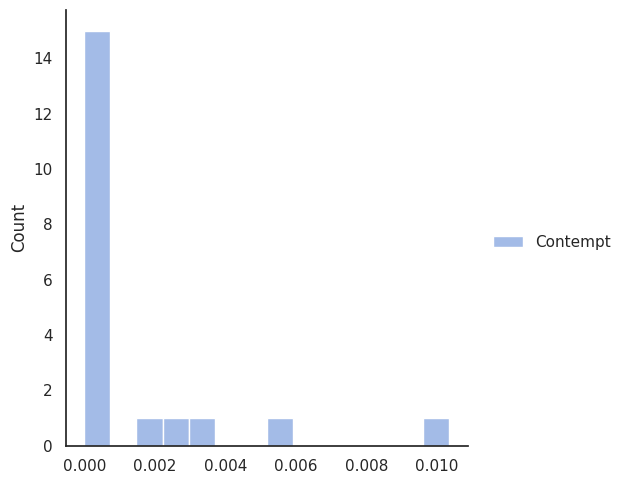

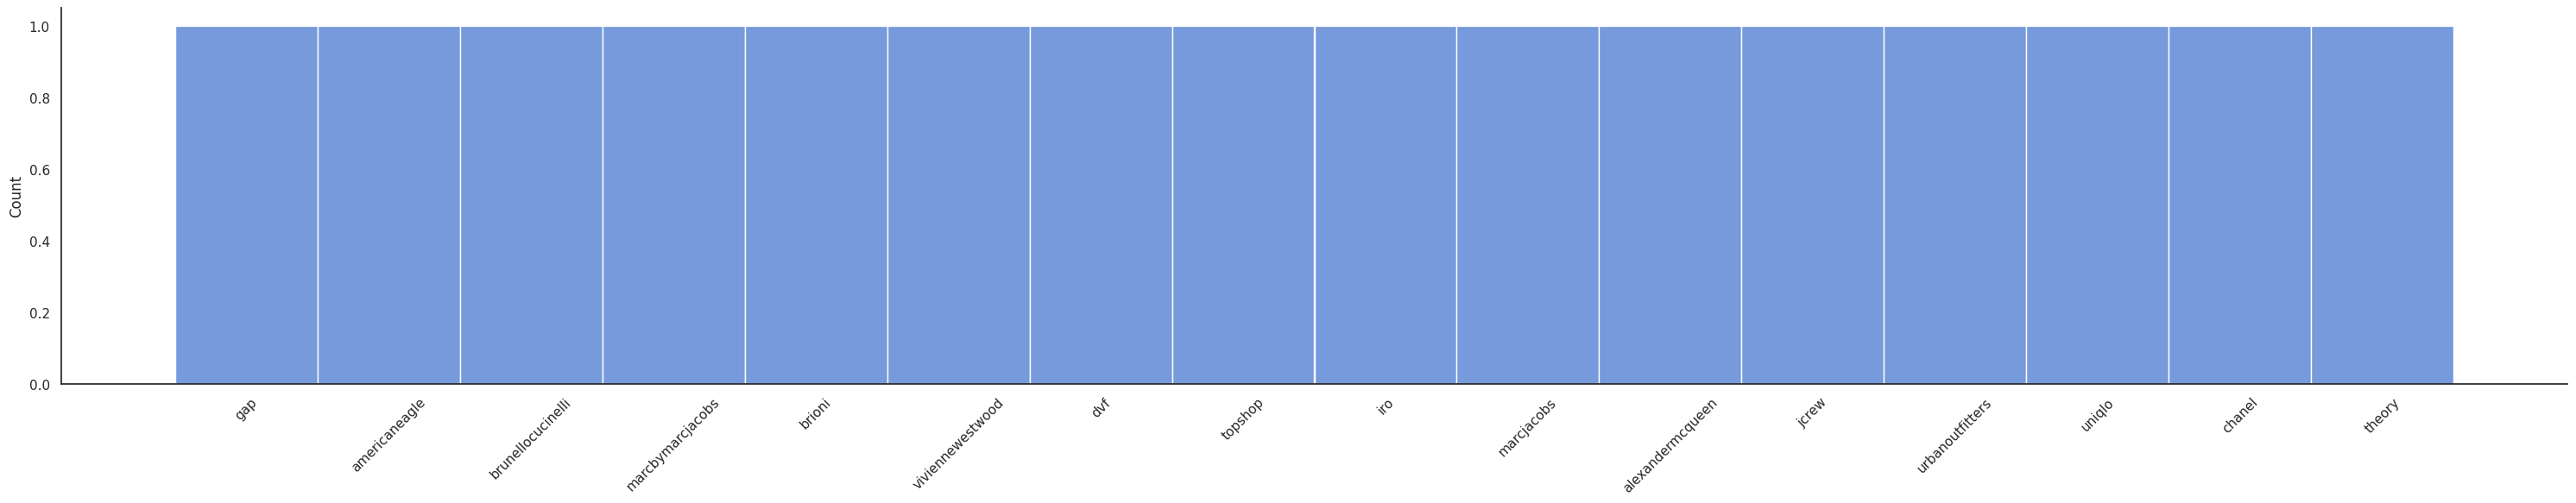

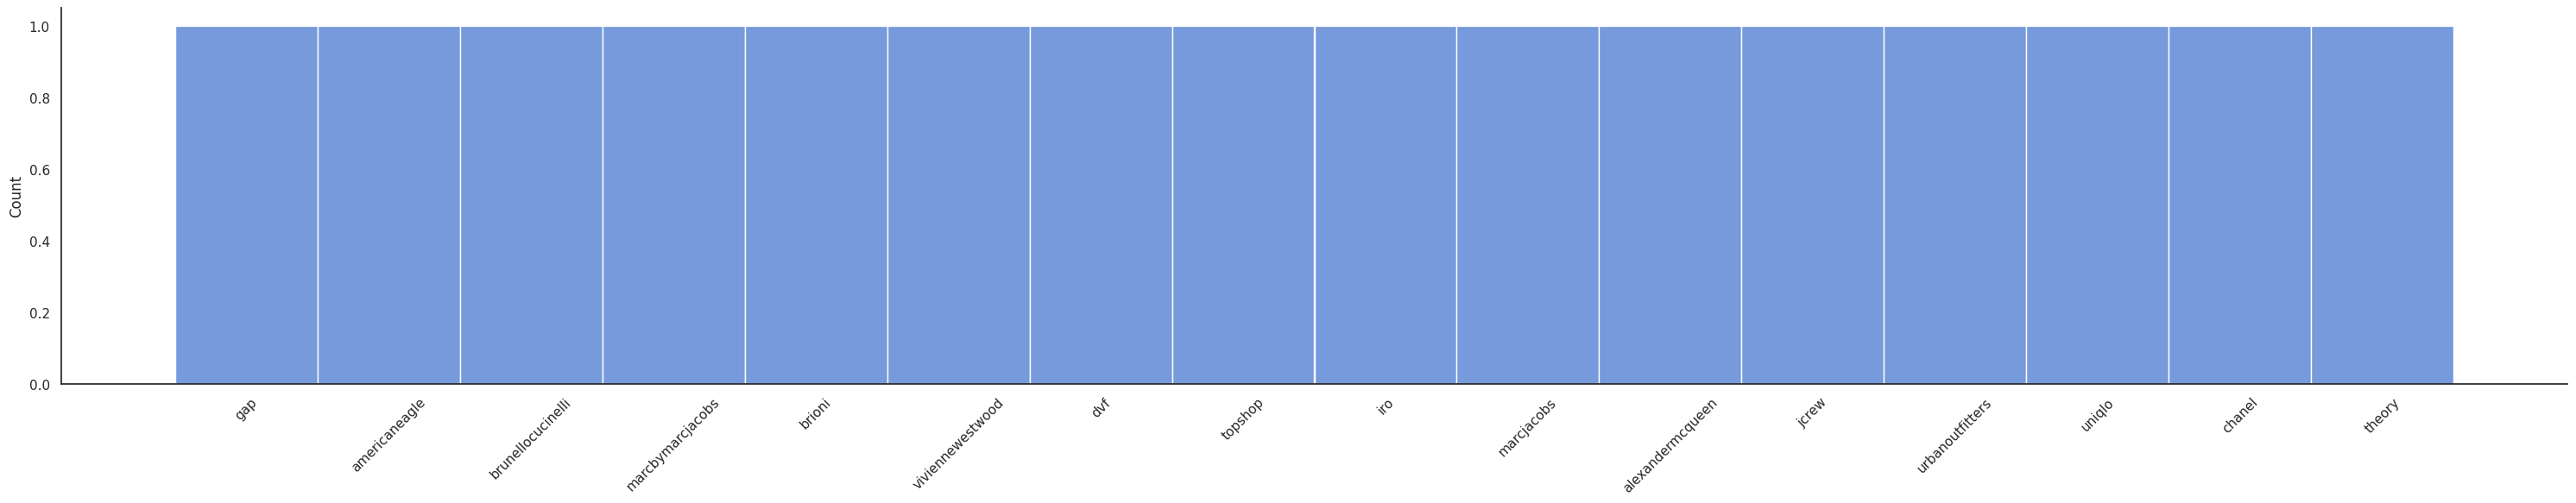

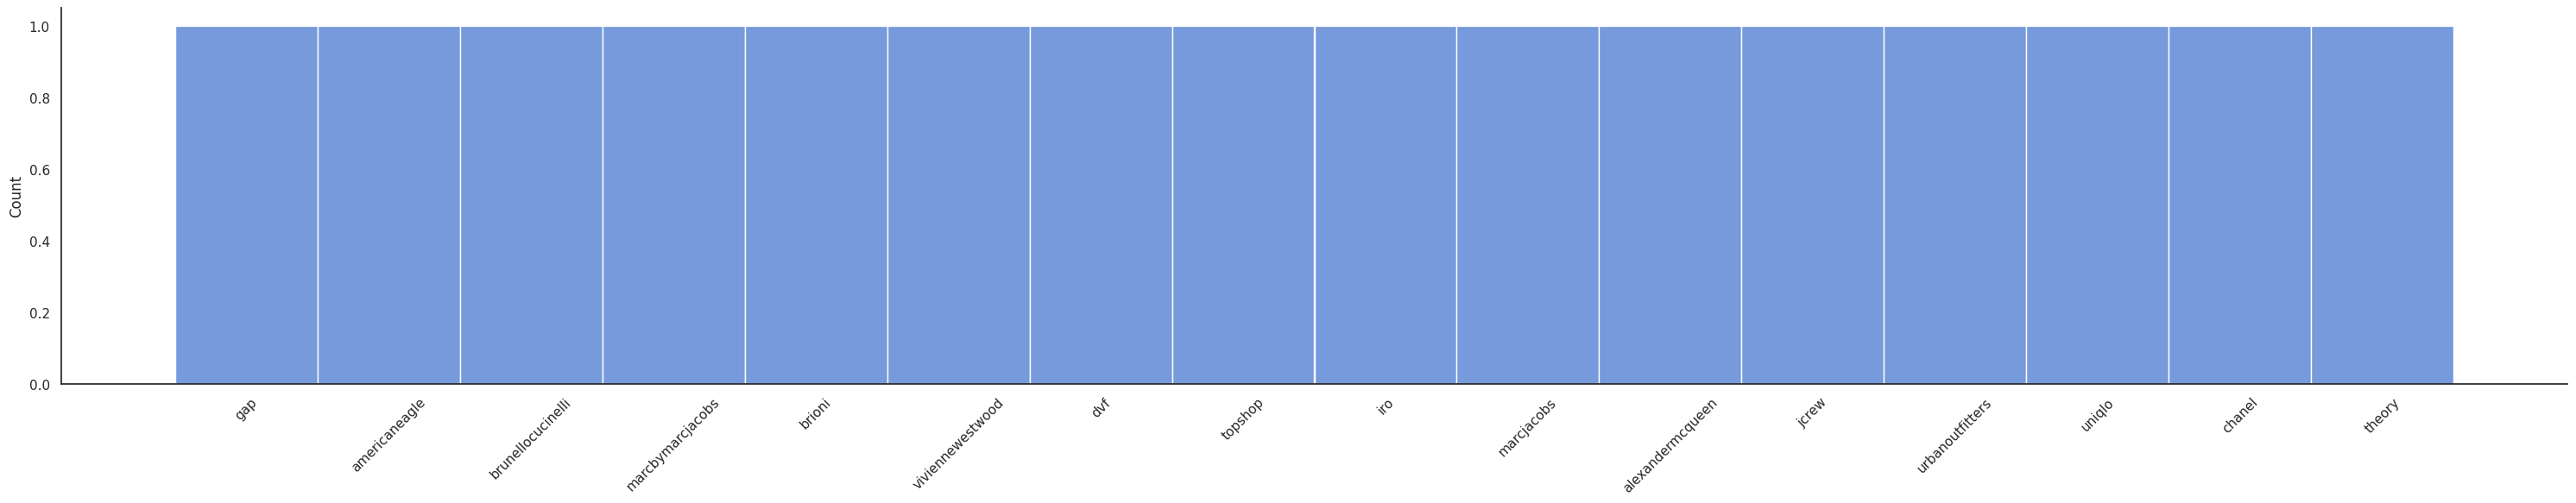

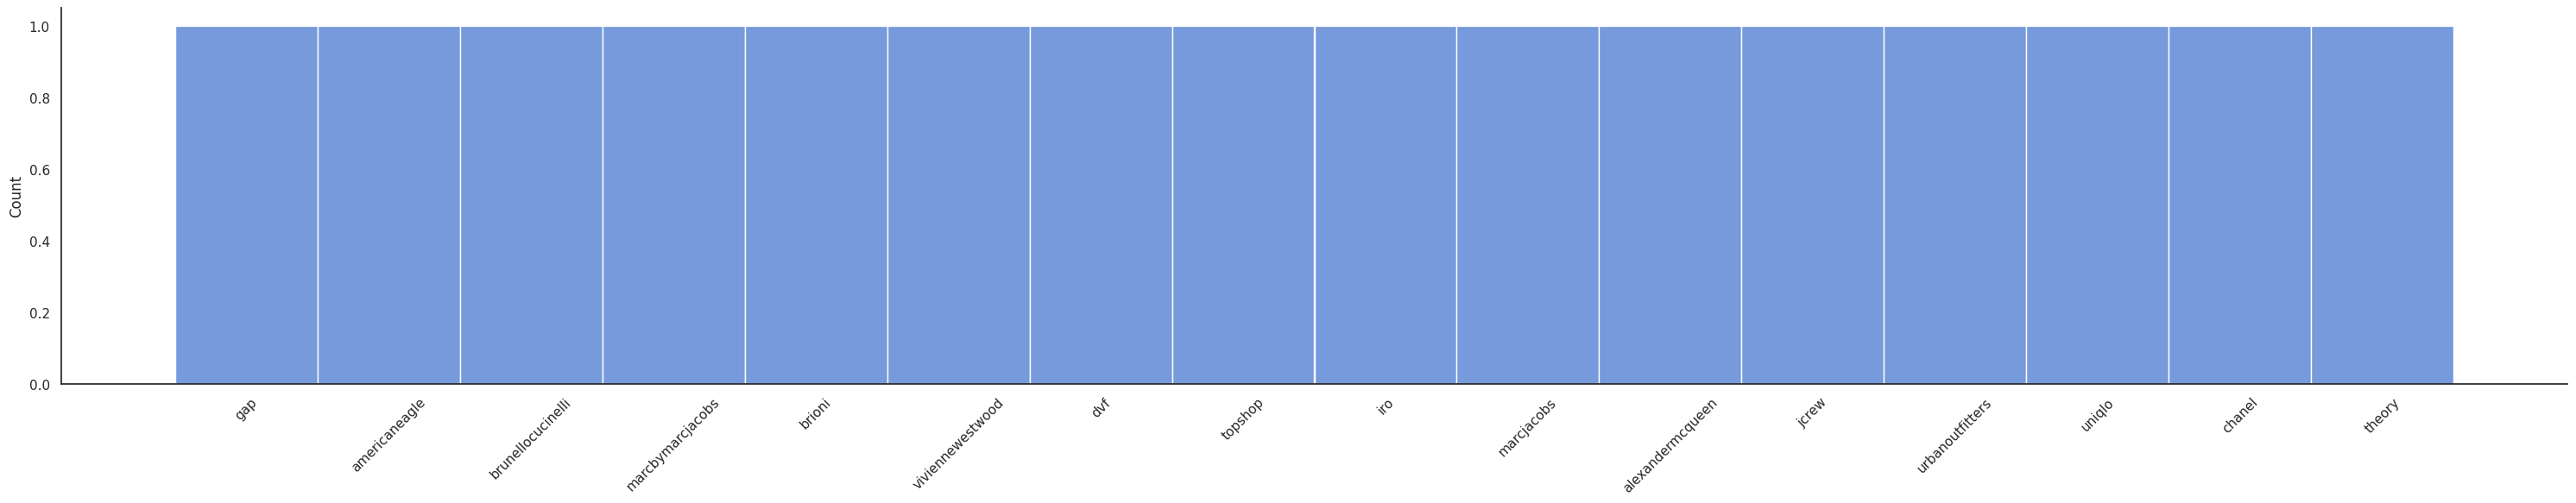

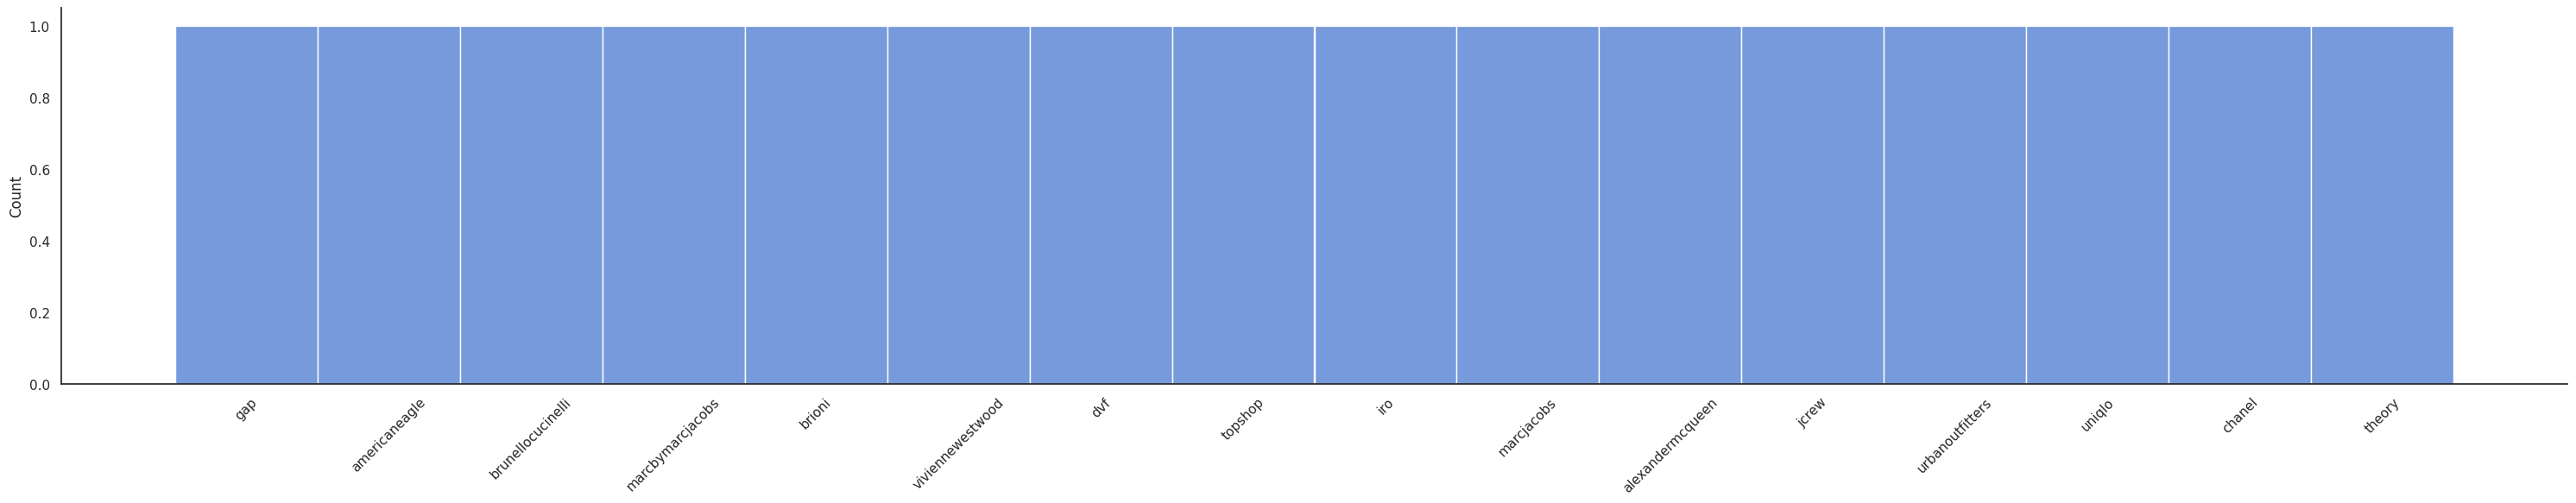

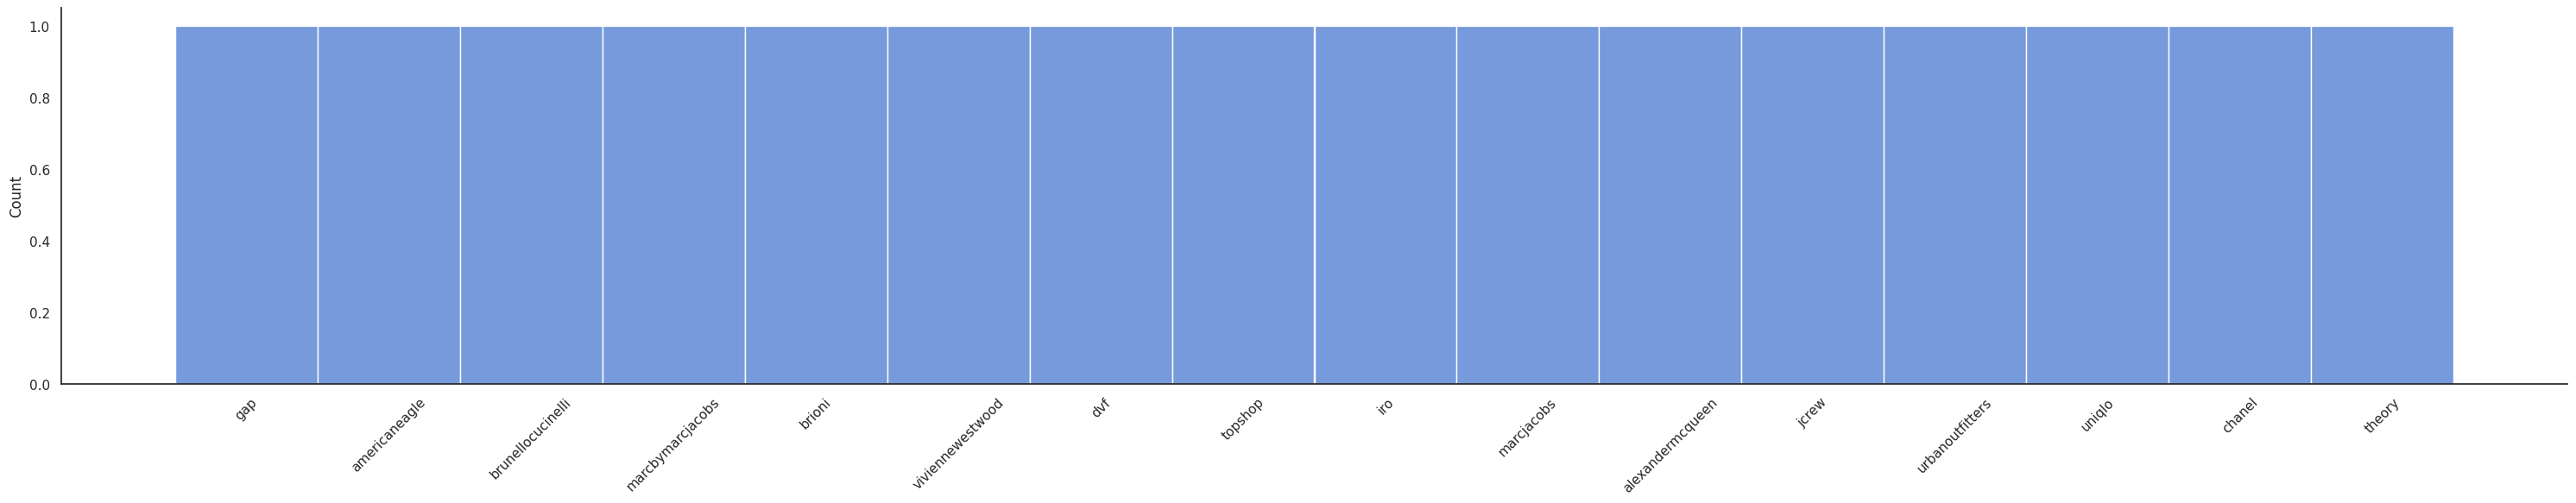

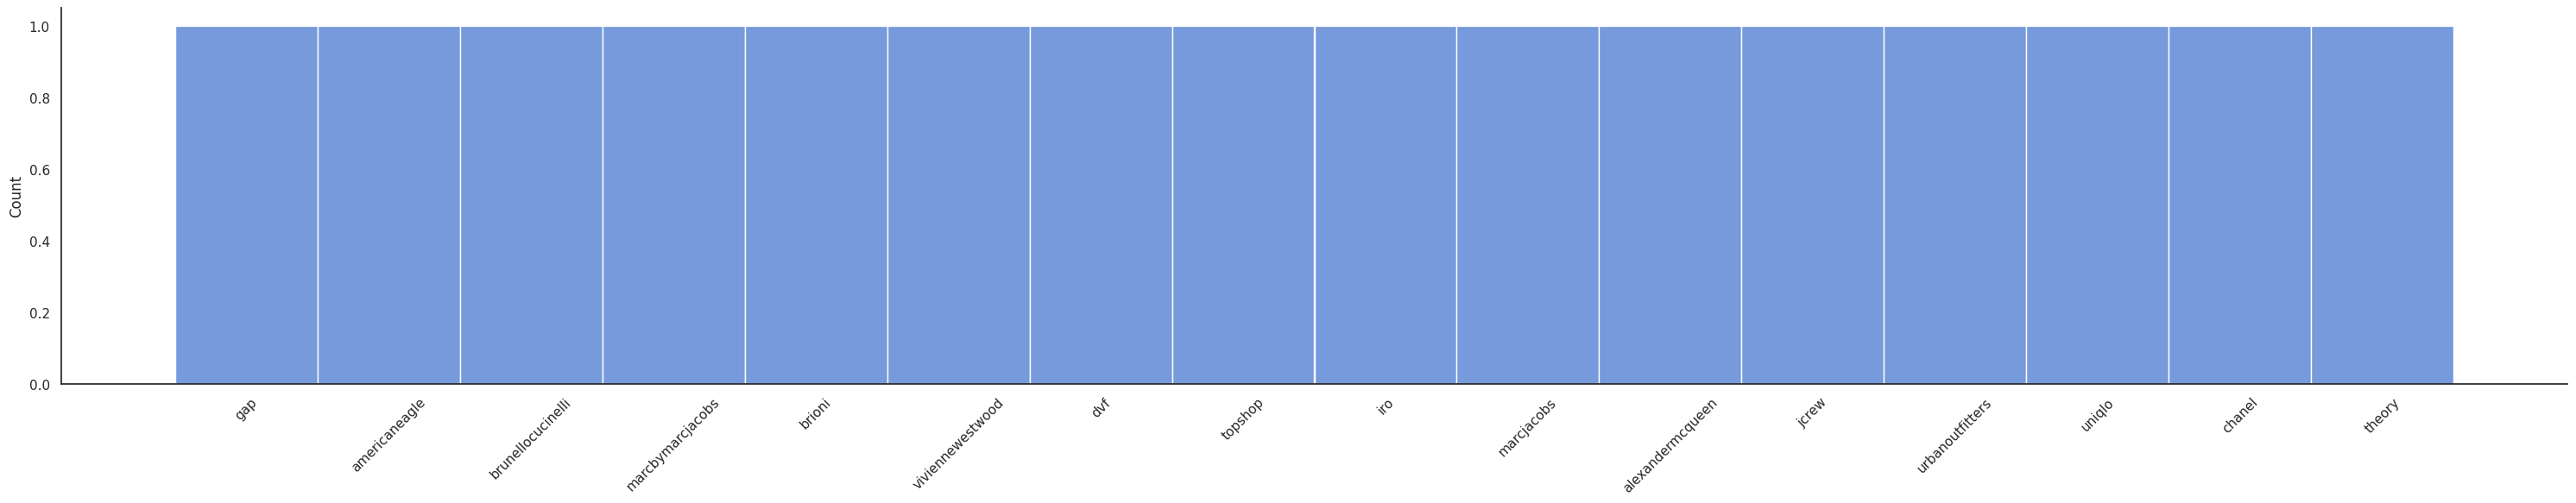

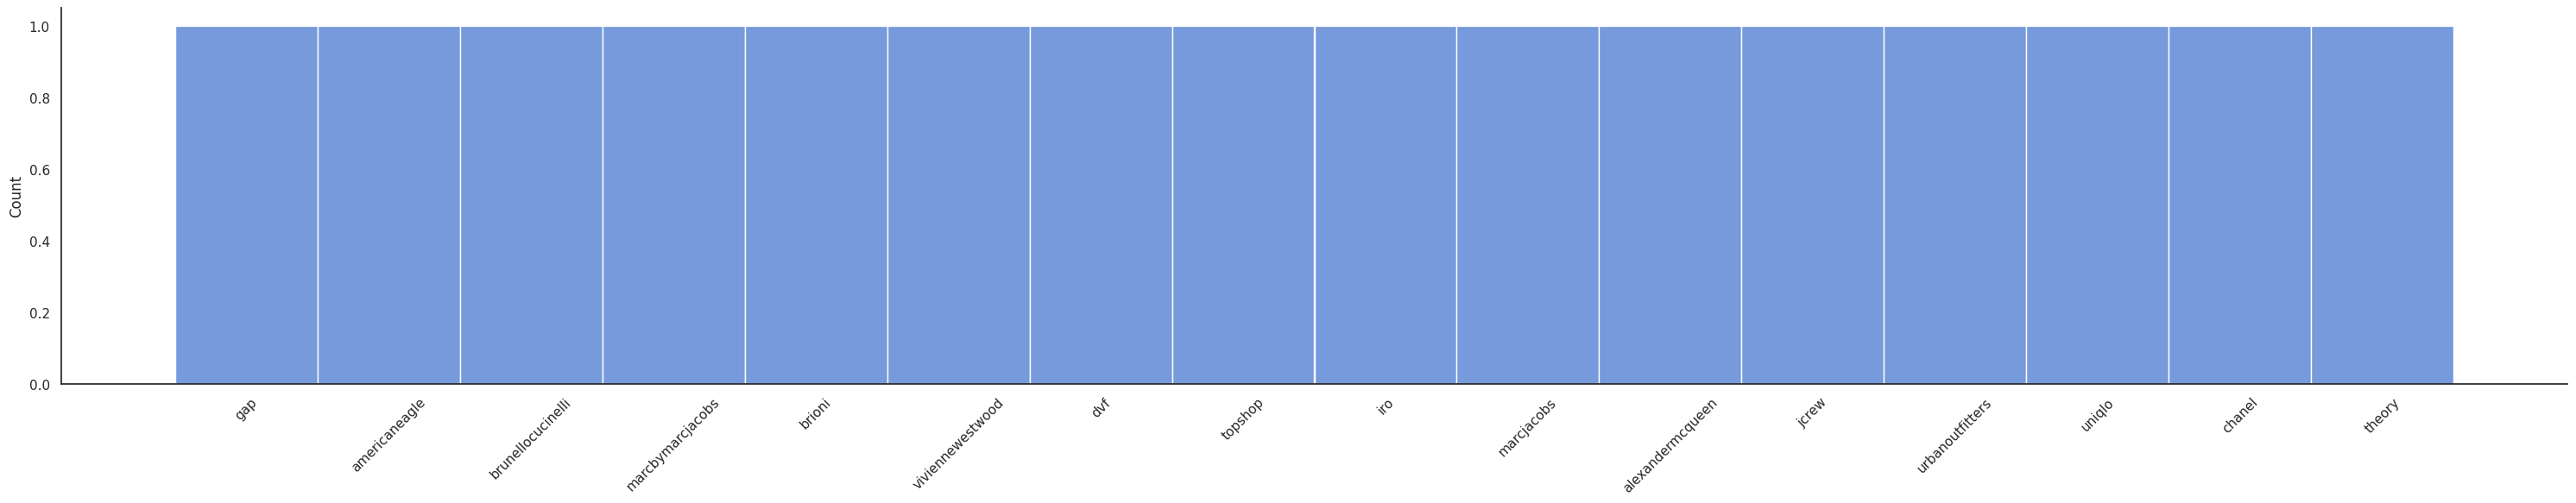

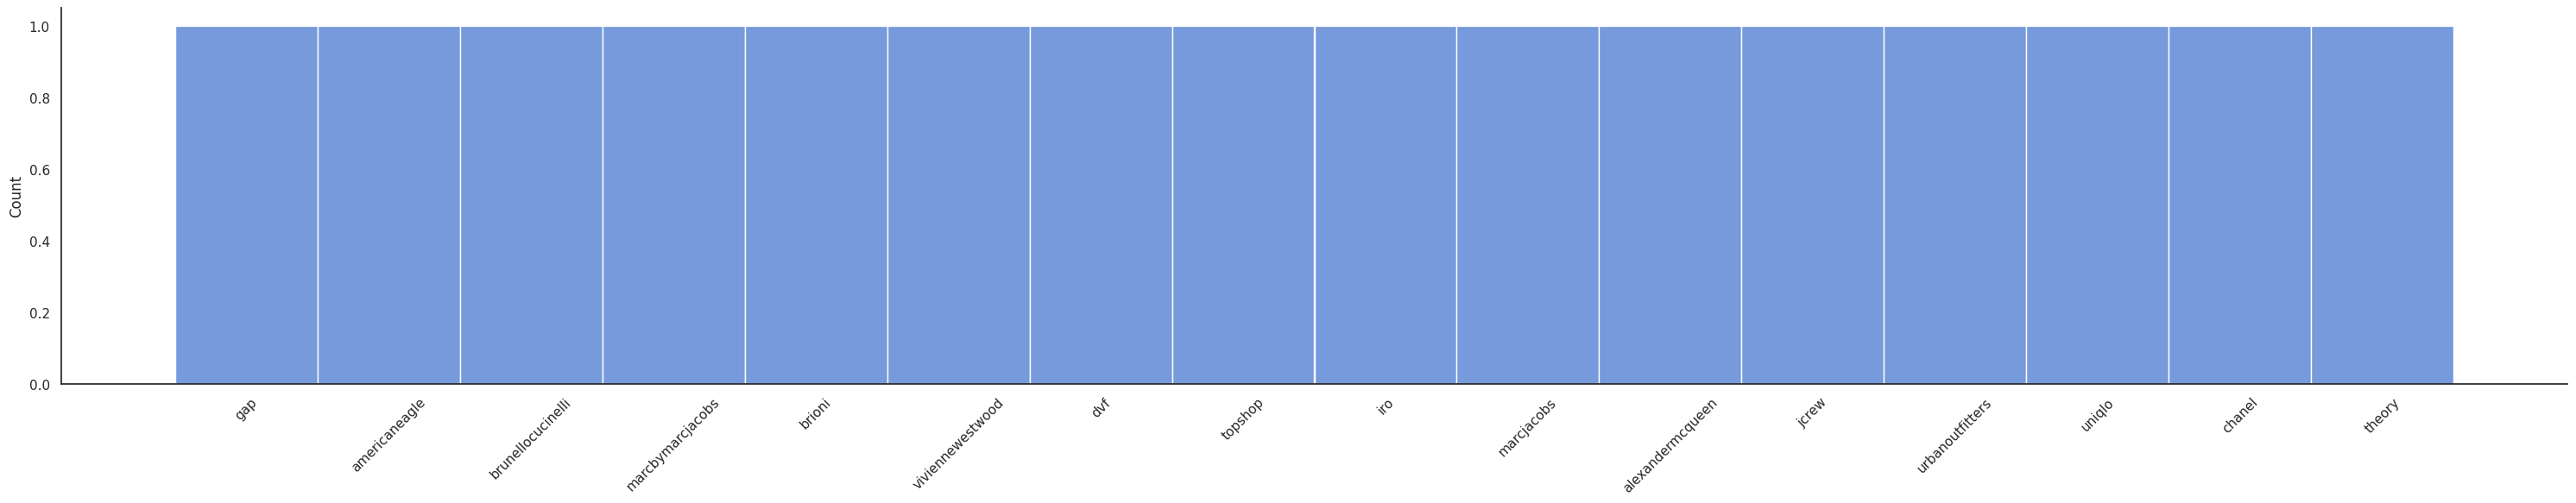

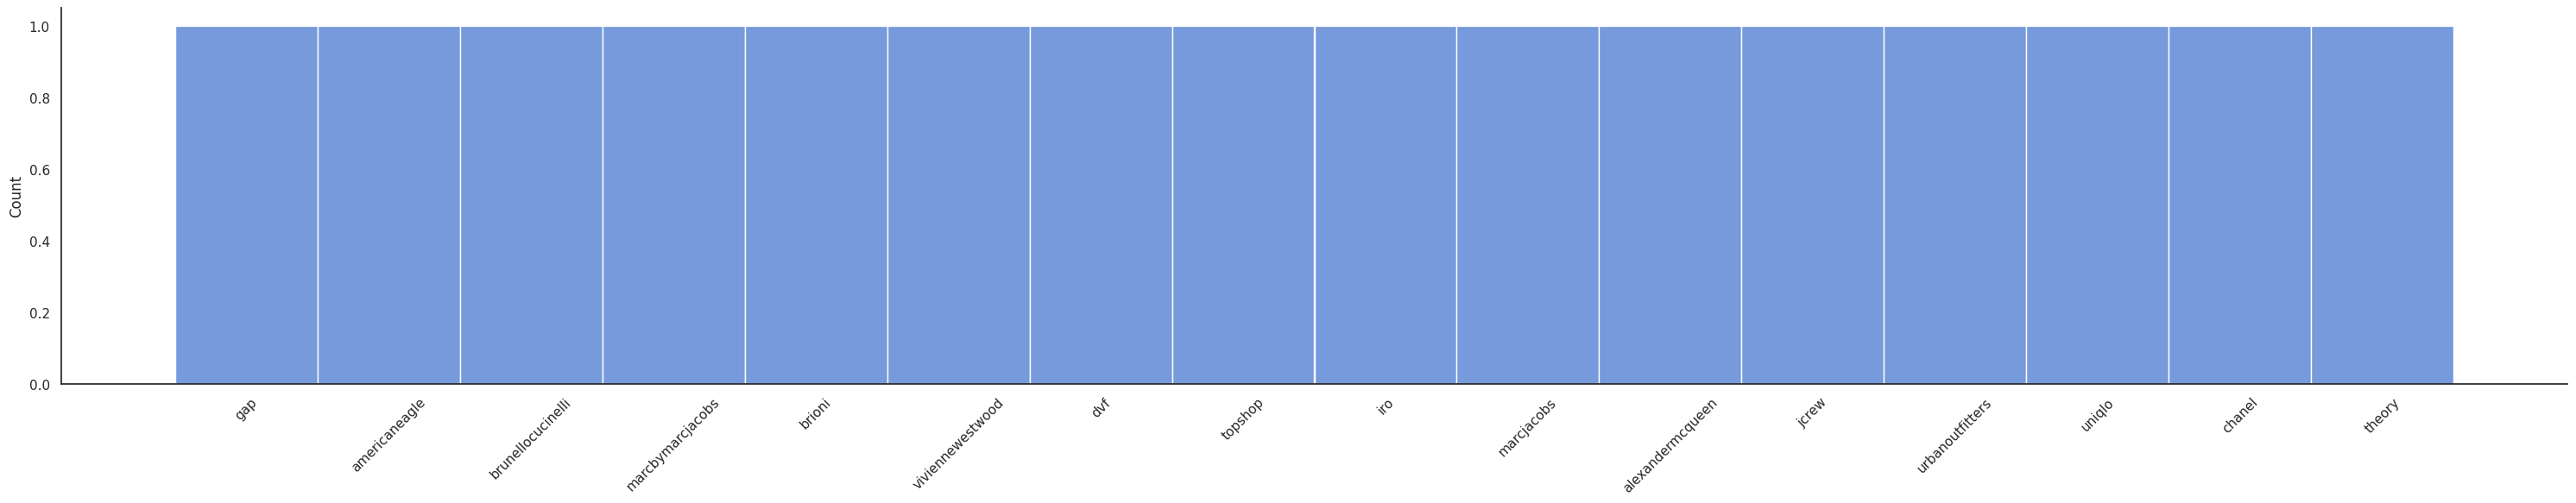

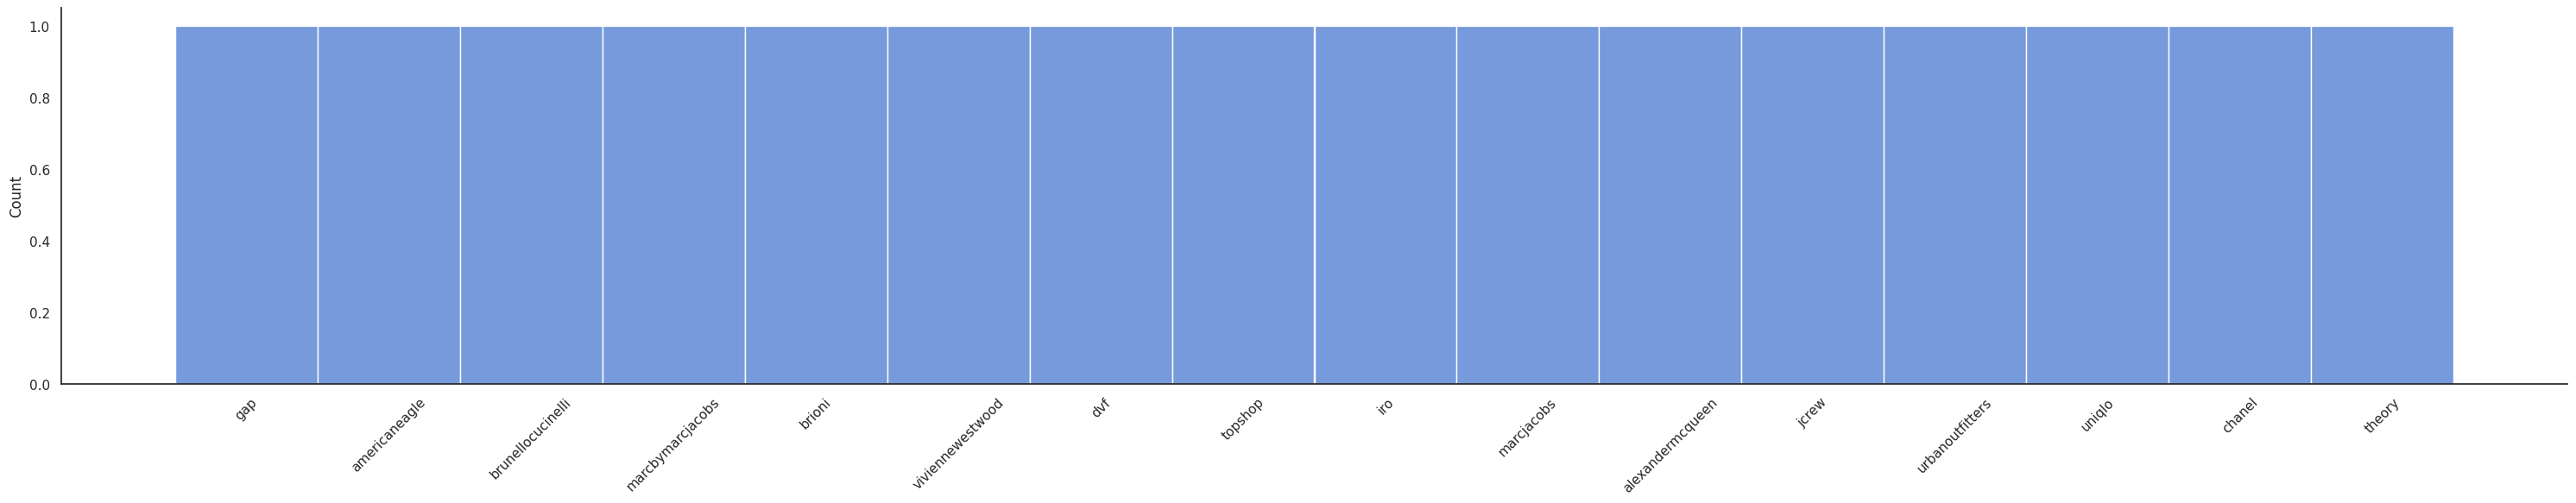

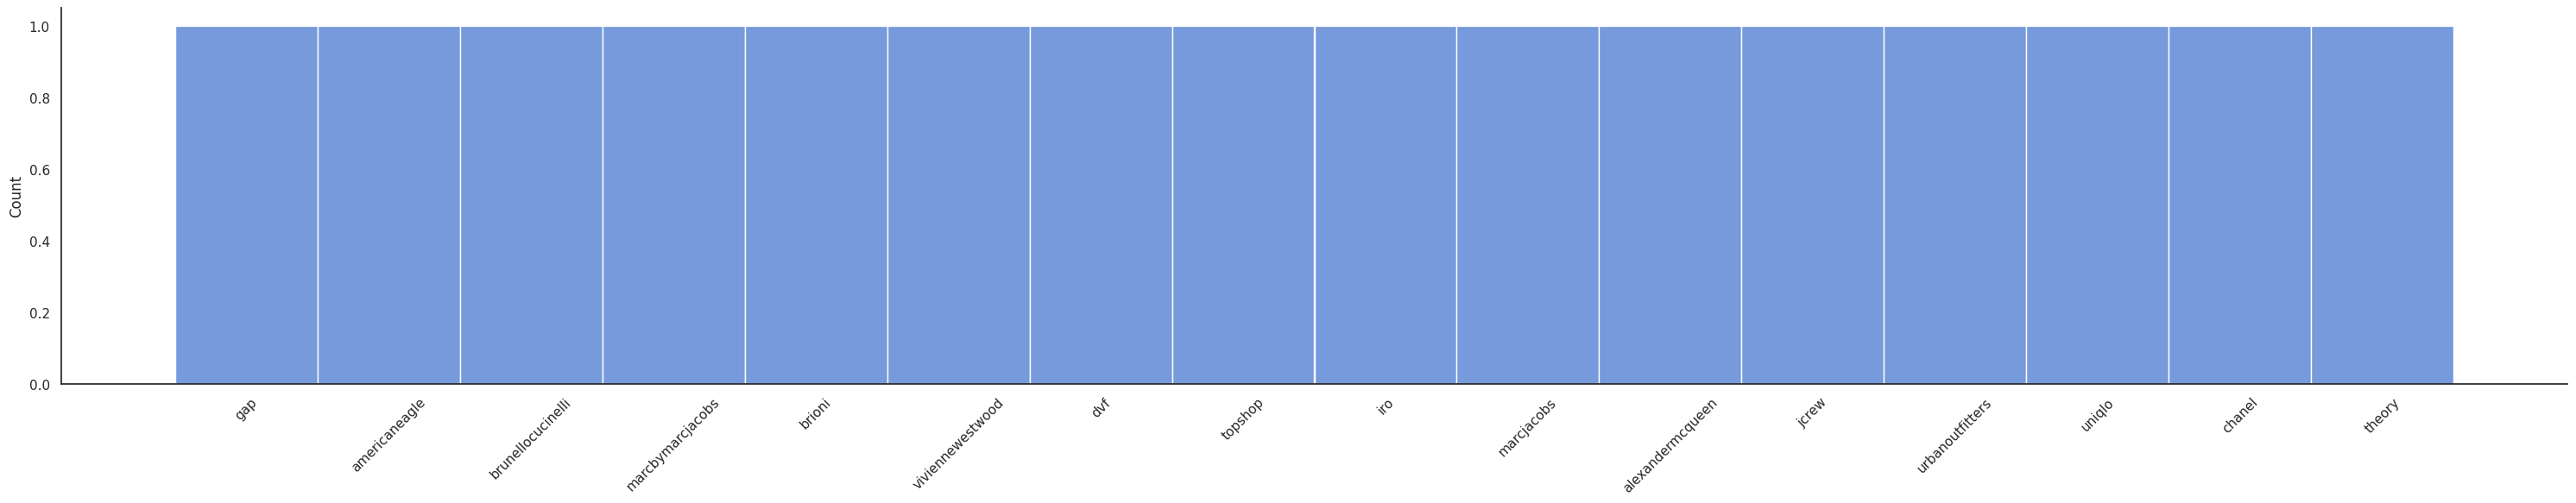

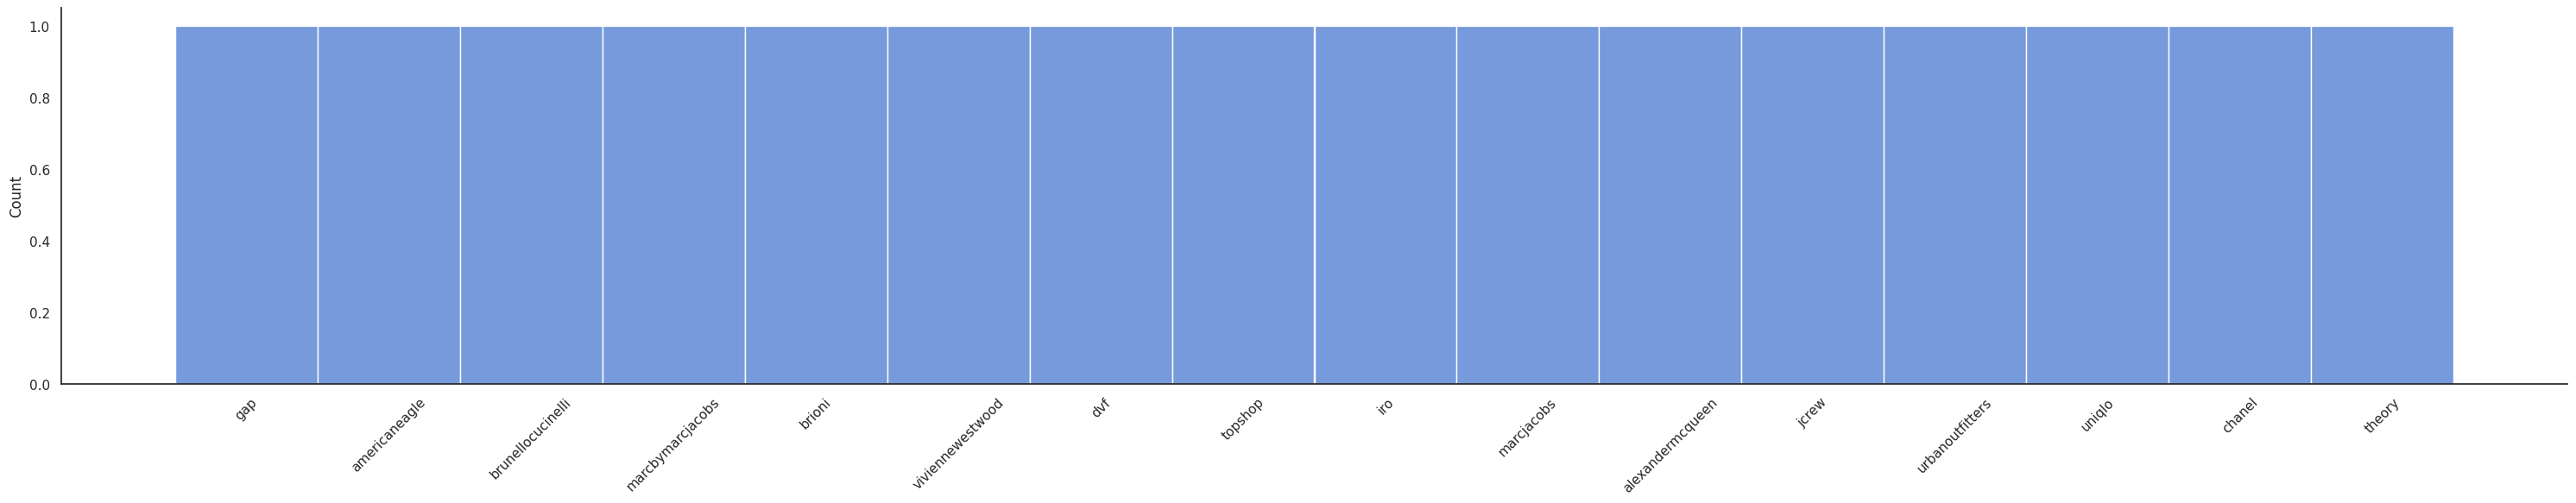

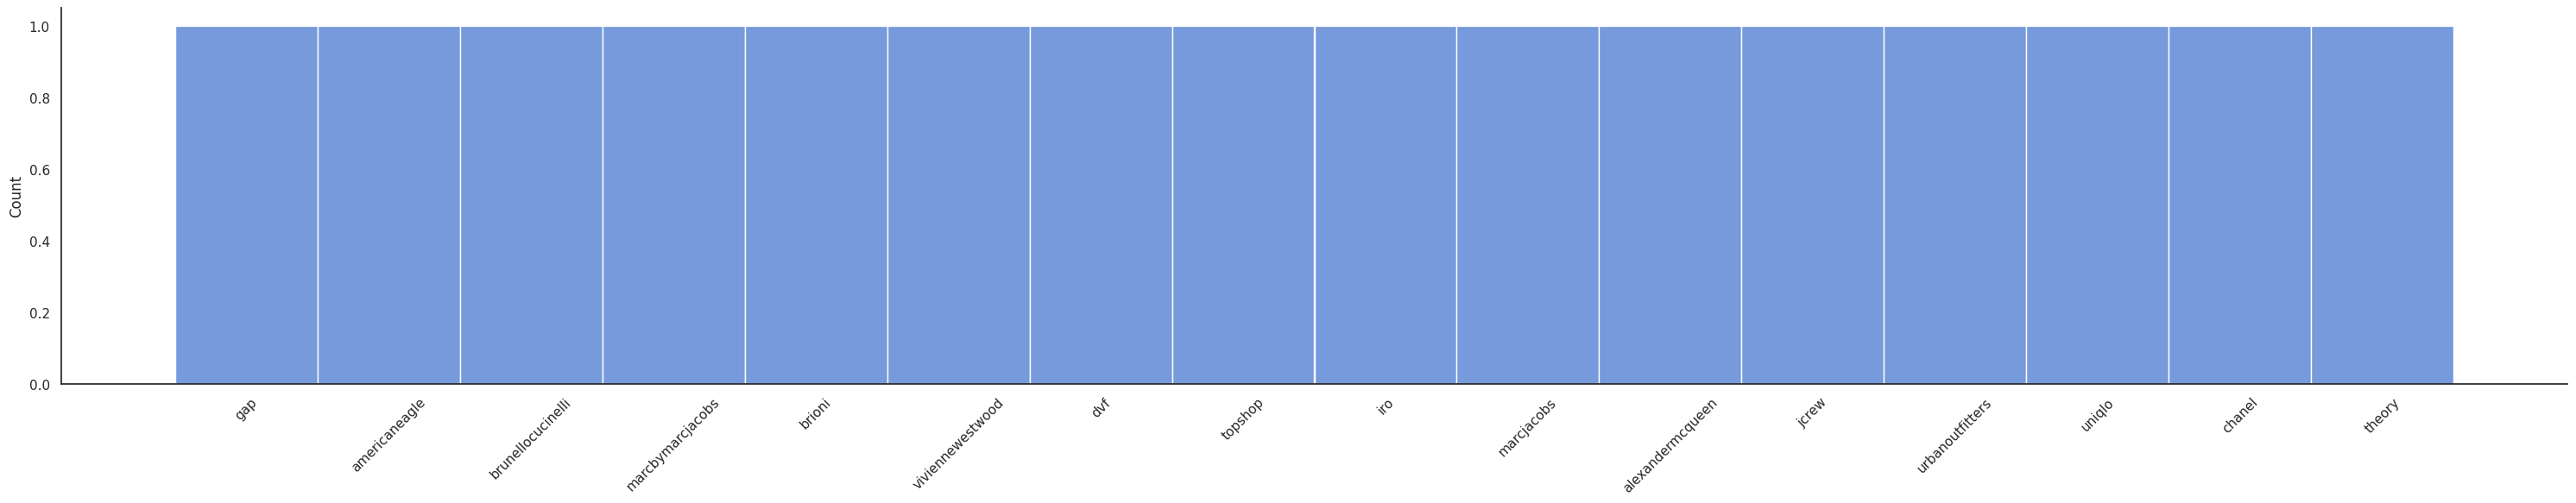

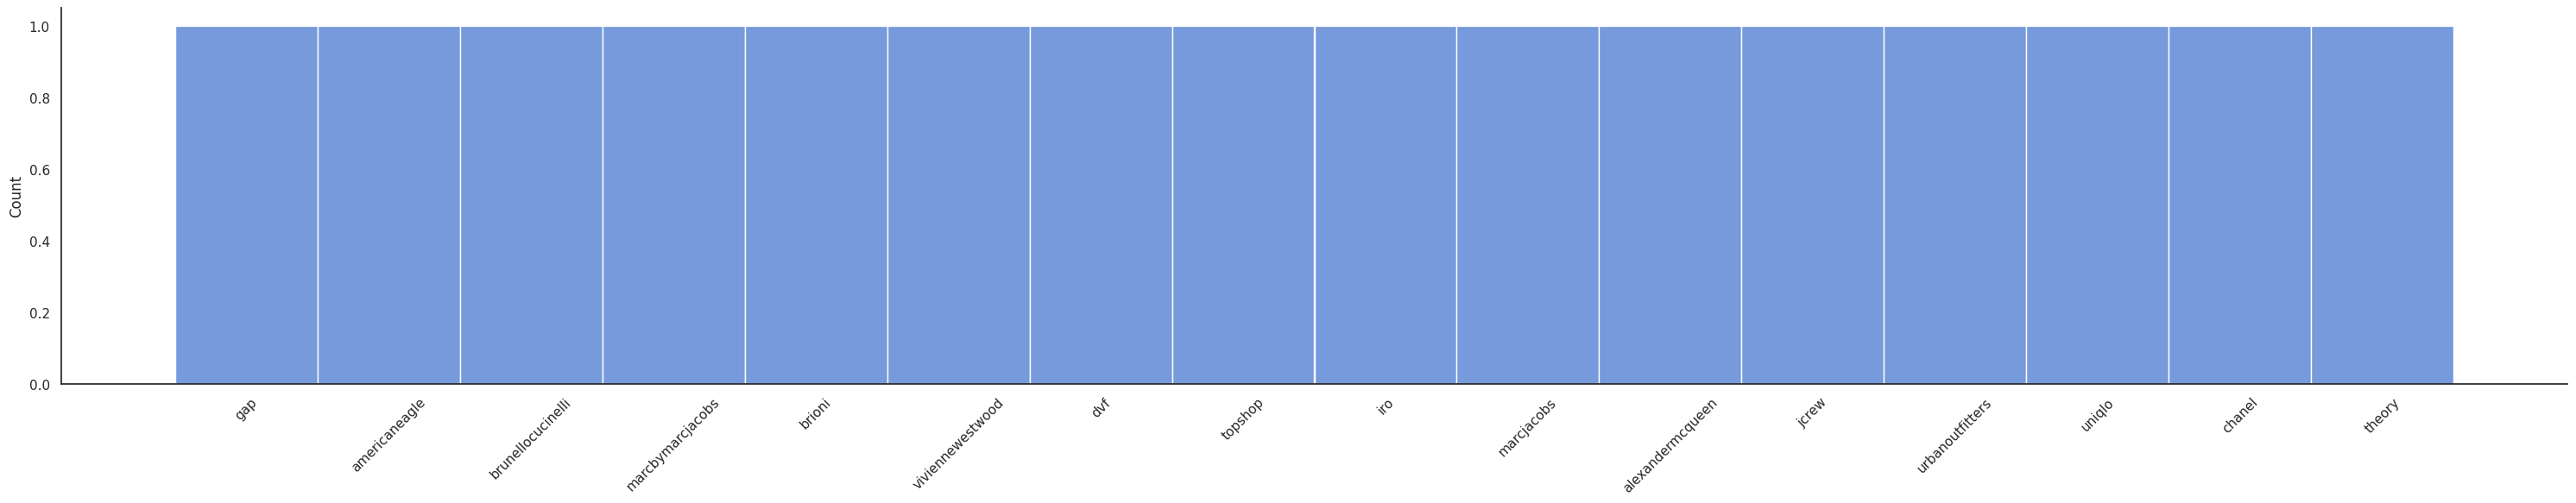

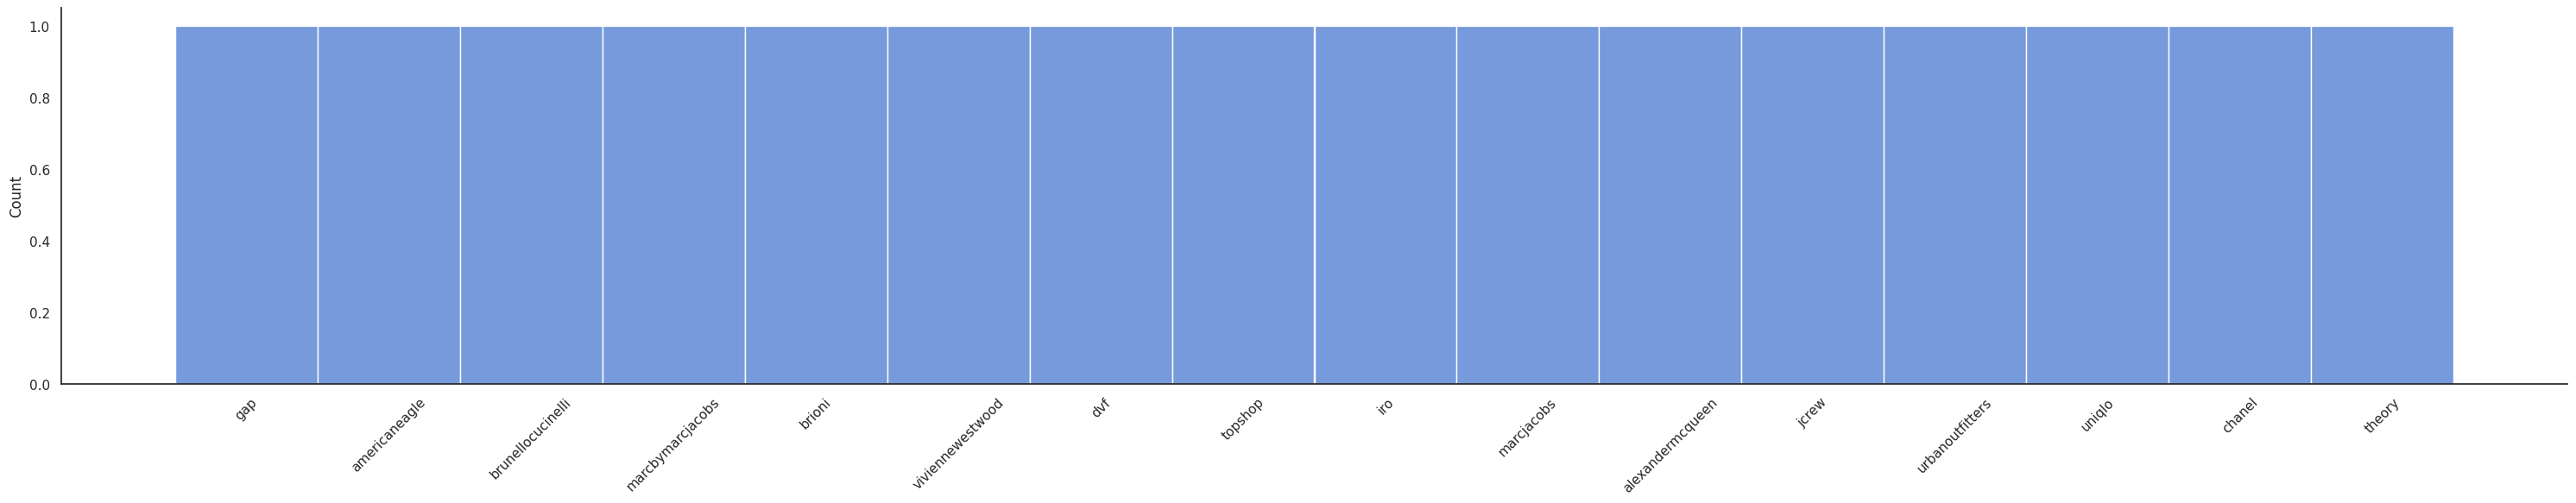

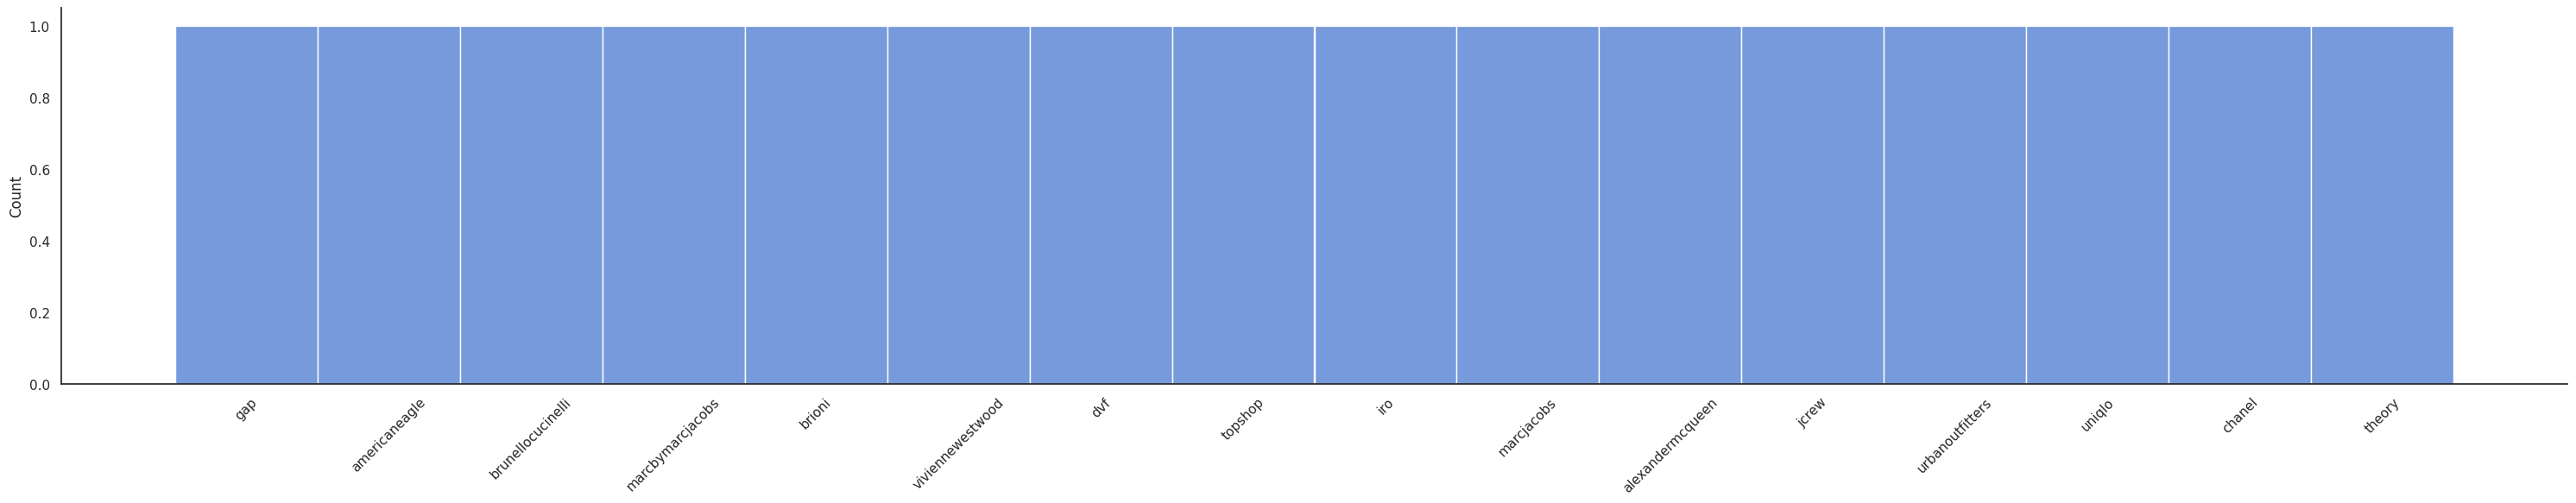

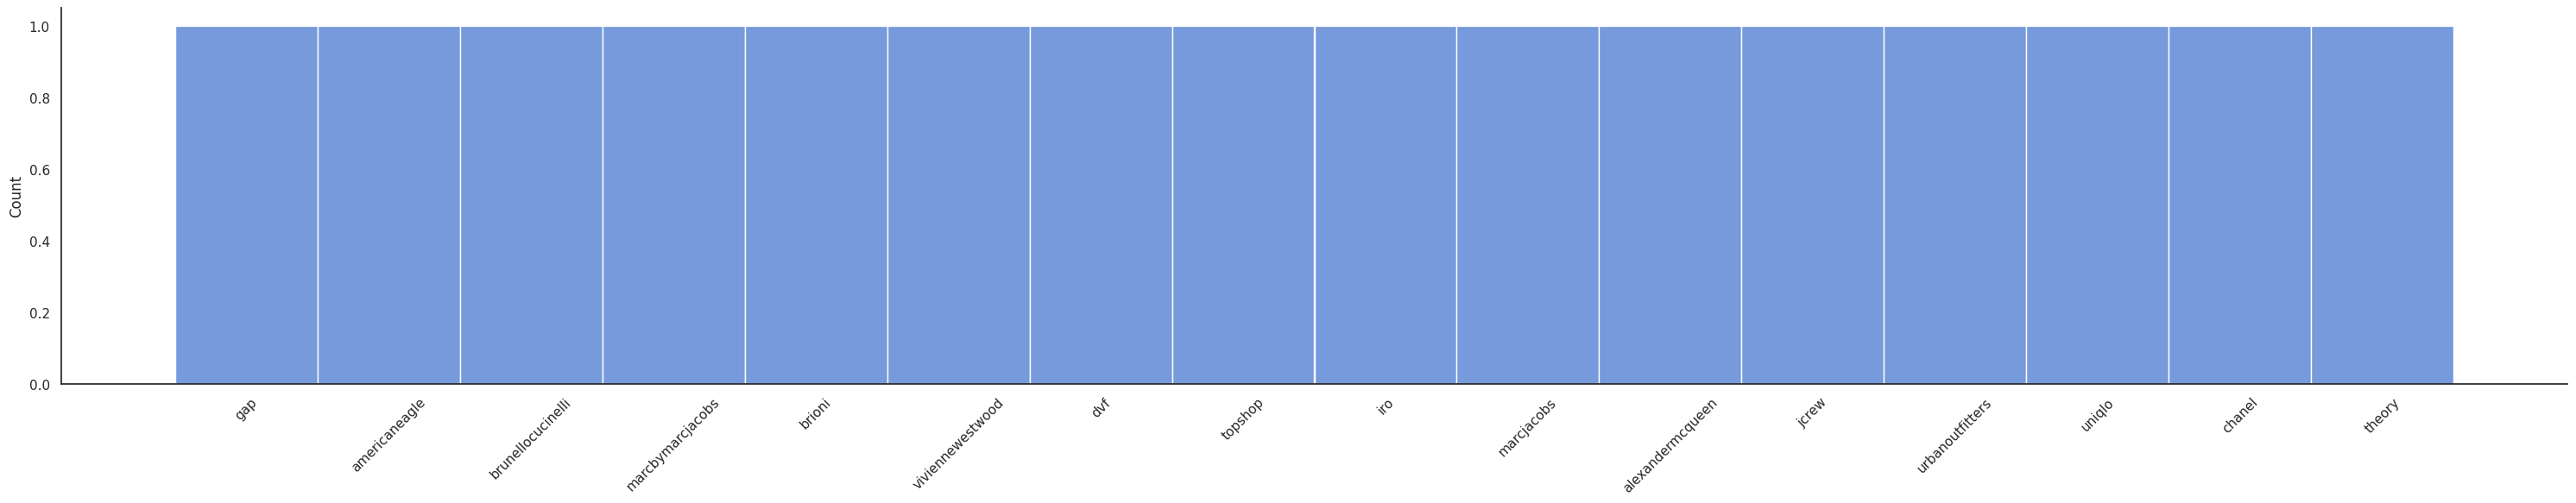

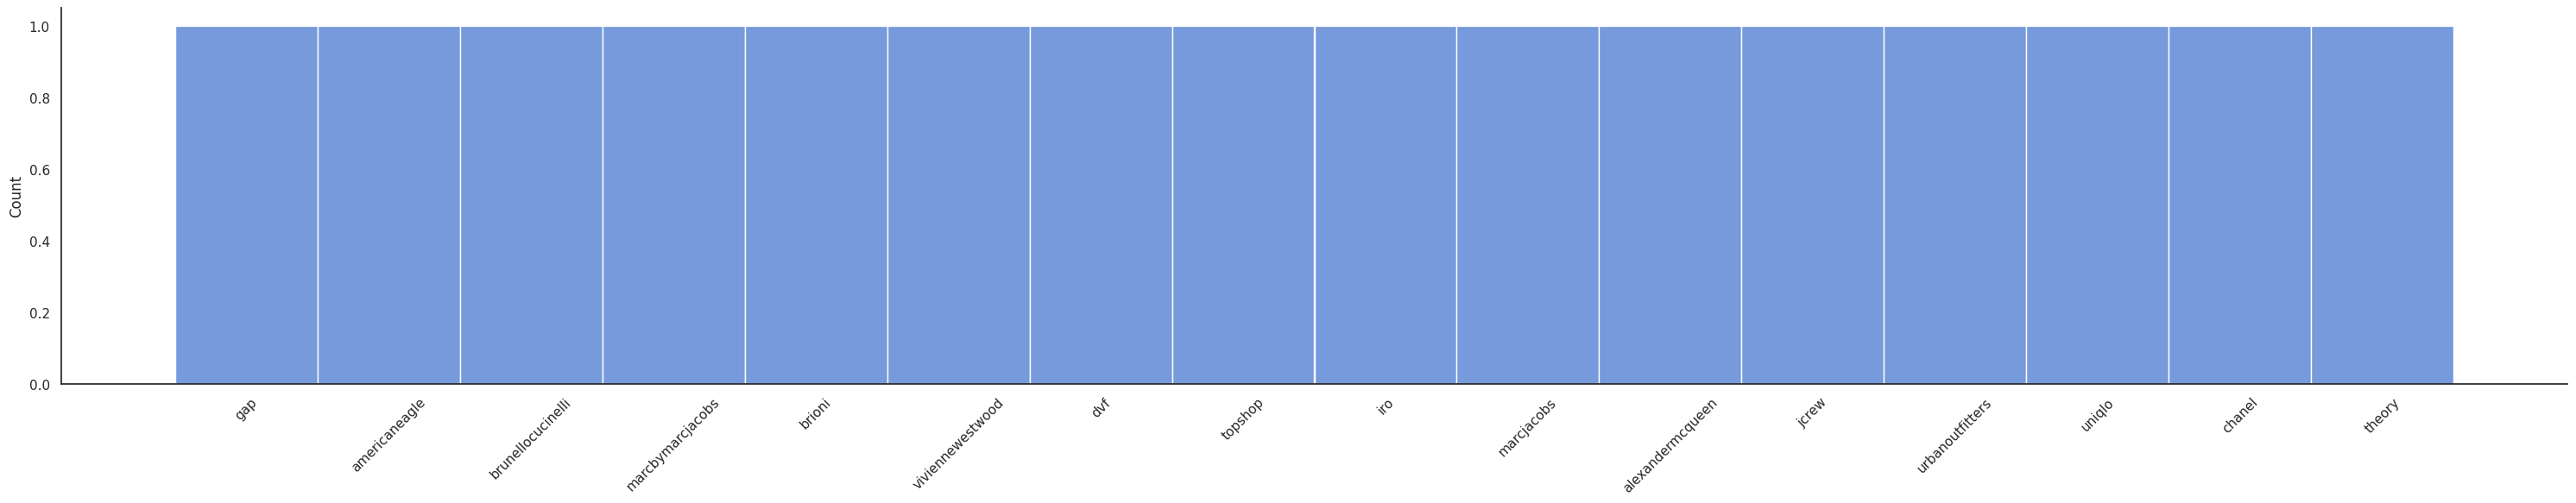

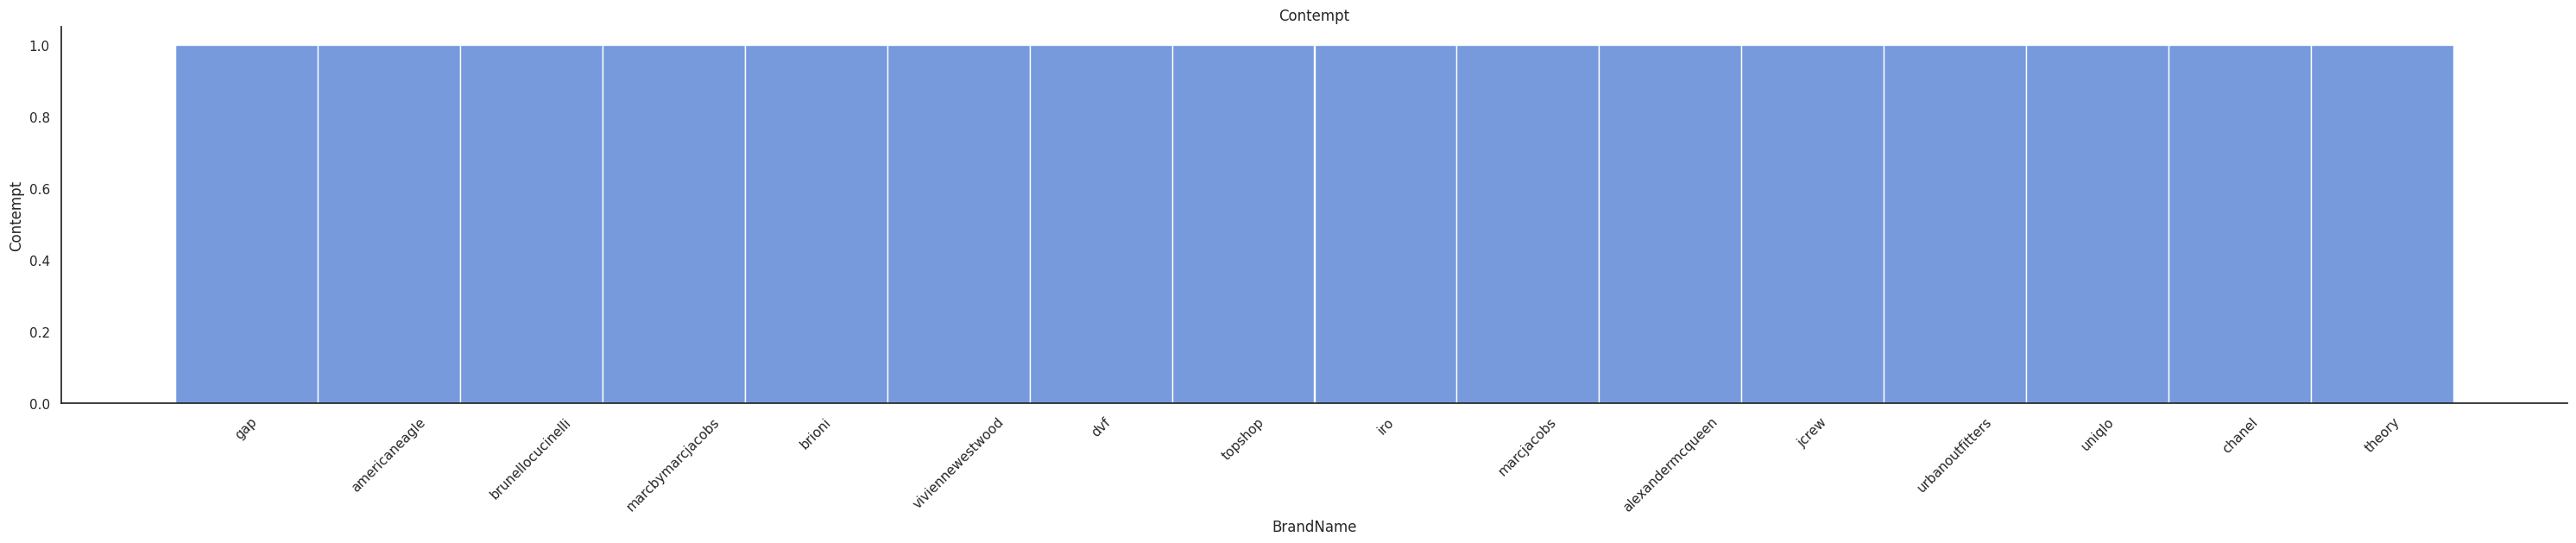

In [265]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.displot(h)

for value in h.BrandName:
    g = sns.displot(data=h.BrandName.unique(), aspect=6)
    plt.xticks(rotation=45);

plt.title("Contempt")
g = (g.set_axis_labels("BrandName", "Contempt"))

plt.xticks(rotation=45);

In [ ]:

h1 = sns.heatmap(h).pivot("UserId", "BrandName", "Contempt")
h1


In [ ]:

result = df_new.pivot(index='UserId', columns='BrandName', values='Contempt')

sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.show()

In [ ]:
names = df_new[ 0:1000]
brands = df_new[]
df_new = pd.DataFrame(df_new, index=names, columns=brands)
heatmap = sns.heatmap(df_new)
loc, labels = plt.xticks()
heatmap.set_xticklabels(labels, rotation=45)
heatmap.set_yticklabels(labels[::-1], rotation=45) # reversed order for y

In [ ]:
g = sns.FacetGrid(df_new, row='BrandName', col='Contempt')
g.map(sns.histplot, "BrandName")
plt.show()

Heatmaping

In [ ]:
sns.jointplot(data=df_new, x='BrandName', y='Contempt', kind='reg', color='g')
plt.show()

In [ ]:
df_new.pivot_table(index='Contempt', columns='BrandName', aggfunc=np.median).UserId

In [ ]:

df = df_new.pivot_table(index='Contempt', columns='BrandName', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

In [ ]:
sns.heatmap(df_new.corr(), annot=True, fmt=".2f")
plt.show()


In [ ]:
fashion.shape

In [ ]:
fashion.info()

In [ ]:
sentiment = (fashion['Hashtags'] == 'cute')

In [ ]:
sentiment.head(10)

# EDA (Exploratory Data Analysis)



In [ ]:
fashion.duplicated()

## Sustainable
### Using the `sum` function, we can see that there are no indications for #Sustainable fashion in our dataset.

In [ ]:
sentiment.sum()

In [ ]:
sentiment2 = (fashion['Hashtags'] == 'gender-fluid')
sentiment2.head()
sentiment2.sum()

In [ ]:
fashion['Hashtags'].describe()

In [ ]:
hashtags = pd.DataFrame(fashion["Hashtags"], dtype="string")
hashtags.head(24)

## Here I am looking for Hashtags that would indicate an "inclusive" and "diverse" sentiment.

In [ ]:
hashtags = pd.DataFrame(fashion["Hashtags"], dtype="string")
hashtags.sample(25)

The words that feel diverse and inclusive seem to be:
> - plussize
> - selflove
> - madeinitaly
> - minimalstyle
> - fleamarket
> - nature

One problem I think might effect using this data to determine whether sentiment is shifting toward sustainablity or not, is that a lot of people who care about the world are now switching to "dumb phone". Their may be a lot of consumers that we don't have access to because they don't engage with social media.

In [ ]:
#I specifically want to try and clean up the Hastags because I'm seeing a lot of numbers when it should just be strings.


# NER Model
 ### Named Entity Recognition

We will identify key information in text and classifictaion. This is a type of NLP.

- Detecting the entities from the text
- Classifying them into different categories

I will be using the model to draw a correlation between the Hashtags, Captions
I want to identify the Hashtags that are "brands", emotions, "diverse and inclusive", etc

 - Brand
 - Emotion
 - Diversity conserned
 - Style
 - Environmental concern
 - New age thoughts
 - Other



links I used to figure out how to use NER on a dataframe

I see that a lot of those "user names" were caught by the "unique" function. I may drop them as a way of cleaning the data a bit more for my model.

In [ ]:
#to replace values
# df.replace(to_replace=old_value, value= new_val)
# I want to replace unique '\u' values with 'Null'

textn = uniques


# printing original list
print("The original list : " + str(textn))

# using list comprehension + startswith() + lower()
# Words starting with specific letter
res = uniques.str.startswith('\\u')

# print result
print("The list of matching first letter : " + str(res))

NameError: ignored